# Исследование рынка российского кинопроката

## Введение

  - **Цель проекта:**   изучить рынок российского кинопроката и выявить текущие тренды, уделив внимание фильмам, которые получили государственную поддержку, чтобы  ответить на вопрос, насколько такие фильмы интересны зрителю. 


  - **Данные:**     база данных, опубликованная на портале открытых данных Министерства культуры. Содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 


  - **План выполнения проекта:**
  
     - Ознакомиться с данными.

     - Сделать предобработку:
 
        - Заменить типы данных, где это необходимо.
  
        - Обработать пропуски.
 
        - Обработать дубликаты.
  
     - Обработать количественные значения:
 
        - Найти и изменить (по возможности) подозрительные значения. 
 
     - Обработать категориальные значения:
   
        - Найти, изучить и устранить (по возможности) проблемные значения.
 
     - Посчитать и добавить новые столбцы:
     
        - Год проката;
     
        - Фамилия и имя главного режиссера;
     
        - Основной жанр фильма.
        
     - Провести исследовательский анализ данных:
   
        - Изучить информацию о прокате (количество фильмов в прокате каждый год, изменение доли фильмов с информацией о прокате;
  
        - Изучить информацию о сборах в прокате (динамика проката и сборов, минимумы, максимумы);
     
        - Посчитать и сравнить медианную и среднюю сборов каждого года;
     
        - Изучить влияние возрастных ограничений на прокат 2015-2019гг (динамика, максимумы, взаимосвязи);
     
        - Изучить фильмы с господдержкой (динамика проката, окупаемость, рейтинги, взаимосвязи).

      - Сформулировать и оформить промежуточный и общий выводы.  

## Знакомство с данными 

- Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

- Проверим тип данных в столбцах, по которым состоится объединение, чтобы привести их к одному типу.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# увеличиваем максимальное количество отображающихся столбцов
pd.set_option('display.max_columns', None)

In [2]:
# читаем файл mkrf_movies и выводим общую информацию
df1 = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
# изучаем 10 первых строк
df1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
# читаем файл mkrf_shows и выводим общую информацию
df2 = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
# изучаем 10 первых строк
df2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [6]:
# смотрим названия колонок
df2.columns, df1.columns

(Index(['puNumber', 'box_office'], dtype='object'),
 Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
        'production_country', 'director', 'producer', 'age_restriction',
        'refundable_support', 'nonrefundable_support', 'budget',
        'financing_source', 'ratings', 'genres'],
       dtype='object'))

In [7]:
# переименовываем колонки puNumber" на "pu_number в обеих таблицах
df1.rename(columns={"puNumber": "pu_number"},inplace = True)
df2.rename(columns={"puNumber": "pu_number"},inplace = True)

# проверяем
df2.columns, df1.columns

(Index(['pu_number', 'box_office'], dtype='object'),
 Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
        'production_country', 'director', 'producer', 'age_restriction',
        'refundable_support', 'nonrefundable_support', 'budget',
        'financing_source', 'ratings', 'genres'],
       dtype='object'))

In [8]:
# пытаемся поменять тип данных в колонке pu_number с object на int перед объединением таблиц
#df1['pu_number']=df1['pu_number'].astype(int)

# но код выдает ошибку:
#ValueError: invalid literal for int() with base 10: 'нет'

In [9]:
# выводим строки со значением 'нет'
df1[df1['pu_number']== 'нет']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# удаляем строку из датафрейма
df1 = df1[df1['pu_number']!= 'нет']
# проверяем
df1[df1['pu_number']== 'нет']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [11]:
# меняем тип данных в колонке pu_number на 'int'
df1['pu_number'] = df1['pu_number'].astype(int)

# проверяем
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [12]:
# создаем переменную с объединенными таблицами df1 и df2 
data_mkrf = pd.merge(
    df2, df1,
    on='pu_number', 
    how='right'    
)
# проверяем
data_mkrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pu_number              7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

In [13]:
# изучаем первые 10 строк
data_mkrf.head(10)

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,221048915,NaN,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,111013716,NaN,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,221038416,NaN,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,221026916,NaN,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,221030815,NaN,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,111013816,NaN,Остановился поезд,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,111007013,2700.0,Любовь и голуби,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,221074614,NaN,Любовь и сигареты,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,121011416,NaN,Отпетые мошенники.,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,111019114,NaN,Отпуск за свой счет,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


### Вывод по первому шагу

- Изучили данные в колонках:


   - **Первая таблица:**
   
-  **'title'**
   
   - пропусков нет, в первых же строках обращают на себя внимание фильмы с одинаковым названием и всеми остальными данными, кроме номеров прокатных удостоверений и дат начала проката: т.е. мы имеем дело с неполными дубликатами (как с ними поступить, решим на следующих шагах);
   
-  **'puNumber'**  
   
   - пропусков нет, название написано "верблюжьим" регистром и тип данных - не int (это надо исправить); 
   
-  **'show_start_date'**  
   
   - пропусков нет, тип данных - object (требует исправления на тип даты);
   
-  **'type'** 
   
   - пропусков нет, с данными все в порядке;
   
-  **'film_studio'**  
   
   - 18 пропусков, тип данных - подходящий, пропуски требуют проверки;
   
-  **'production_country'** 
   
   - 2 пропуска, попробуем заменить;
   
-  **'director'**  
   
   - 9 пропусков (не критично, но, возможно, удастся заменить), тип данных - соответствующий;
   
-  **'producer'** 
   
   - пропусков - 8% (возможно, не всегда было известно имя продюсера, особенно если речь о советских фильмах), тип данных - ок; 

-  **'age_restriction'** 
   
   - пропусков нет, тип данных - подходящий, но строчки слишком длинные - попробуем сократить;

-  **'refundable_support'**, **'nonrefundable_support'**, **'budget'**   
   
   - 95% данных пропущено - многовато, но, возможно, именно столько (5%) фильмов с господдержкой в данных.  С типом - порядок;

-  **'financing_source'**  

   - та же история, тип данных - подходящий;

-  **'ratings'**  
   
   - 13% пропусков - довольно много, вряд ли чем-то можно будет заменить, для анализа данных должно хватить (будем разбираться). Тип данных требует замены на int;



   - **Общие данные в двух таблицах:**
   
   
-  для успешного объединения двух таблиц провели преобразования: 
   
    - **заменили название** и **тип данных** в колонке **puNumber** на **pu_number** и **int** соответственно. Также, предварительно, **удалили строку** с аномальным значением;
   
    - **создали переменную** c объединенными данными из двух таблиц (выбрали **how='outer'**, чтобы в общий  датафрейм попали все необходимые данные из обеих таблиц). 

## Предобработка данных

### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где необходимо.

In [14]:
# меняем тип данных в колонке show_start_date на дату (2013-01-17T12:00:00.000Z)
data_mkrf['show_start_date'] = pd.to_datetime(data_mkrf['show_start_date'],
                                              format='%Y-%m-%dT%H:%M:%S')
# проверяем
print(data_mkrf['show_start_date'])

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7480   2019-12-23 12:00:00+00:00
7481   2019-12-24 12:00:00+00:00
7482   2019-12-28 12:00:00+00:00
7483   2019-12-30 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns, UTC]


In [15]:
# пытаемся заменить тип данных в колонке ratings на float 
# data_mkrf['ratings'] = data_mkrf['ratings'].astype(float)

# но код выдает ошибку:
#ValueError: could not convert string to float: '99%'

In [16]:
# проверяем уникальные значения в колонке
data_mkrf['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
# отбрасываем % в строках (аномалии удалим на следующих шагах)
data_mkrf['ratings'] = data_mkrf['ratings'].str.replace('%', '')

# проверяем
data_mkrf['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [18]:
# меняем тип данных в колонке ratings на вещественное число
data_mkrf['ratings'] = data_mkrf['ratings'].astype(float)

In [19]:
# поменяем float64 на float32 для экономии памяти
data_mkrf[['box_office','refundable_support',
      'nonrefundable_support','budget','ratings'
          ]
    ]= data_mkrf[['box_office','refundable_support',
              'nonrefundable_support','budget','ratings'
                  ]
            ].astype('float32')

# проверяем
data_mkrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   pu_number              7485 non-null   int64              
 1   box_office             3158 non-null   float32            
 2   title                  7485 non-null   object             
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7467 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7476 non-null   object             
 8   producer               6917 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float32            
 11  nonrefundable_support  332 non-null    float32          

### Изучение пропусков

- Найдем и заполним пропуски.

In [20]:
# выводим пропуски
data_mkrf.isna().sum().sort_values(ascending = False)

refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
pu_number                   0
title                       0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

In [21]:
# заменяем пропуски в колонках refundable_support, nonrefundable_support, budget на 0,
# (пропуски в refundable_support, nonrefundable_support, budget - это отсутствие бюджетного финансирования)
# (пропуски в box_office - это данные, которые  не предоставили прокатчики)
columns_to_replace = ['box_office','budget','refundable_support','nonrefundable_support']

for column in columns_to_replace:
    data_mkrf[column] = data_mkrf[column].fillna(value = 0)
    
# проверяем
data_mkrf[['box_office','budget','refundable_support','nonrefundable_support']].isna().sum()    

box_office               0
budget                   0
refundable_support       0
nonrefundable_support    0
dtype: int64

In [22]:
# меняем пропуски в колонке financing_source на not
# (пропуски - это отсутствие бюджетного финансирования)
data_mkrf['financing_source'] = data_mkrf['financing_source'].fillna(value = 'not')

# проверяем
data_mkrf['financing_source'].isna().sum()

0

In [23]:
# смотрим на строки с пропусками в колонке ratings
data_mkrf[data_mkrf['ratings'].isna()].head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
43,121000606,0.0,Мемуары гейши (по роману Артура Голдена),2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,NaN,NaN
150,111013615,0.0,Жди меня,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,not,NaN,NaN
154,221037813,0.0,Дом из песка и тумана (по книге Андре Дюбуи III),2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,NaN,NaN
159,224011014,0.0,Жемчужная девушка,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,NaN,NaN
227,111026714,0.0,Полустанок,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,NaN,NaN


In [24]:
# проверяем, встречаются ли среди дубликатов с названиями фильмов строки с пропущенным рейтингом 
titles = data_mkrf.loc[data_mkrf['title'].duplicated(), 'title']

for i in titles:
    
    res = data_mkrf.loc[data_mkrf['title'] == i, 'ratings'].isna().sum()
res    

0

In [25]:
# проверяем, встречаются ли пропуски в рейтинге среди фильмов с одинаковым названием 
title = data_mkrf['title'].unique()

for i in title:
    
    res = data_mkrf.loc[data_mkrf['title'] == i, 'ratings'].isna().sum()
res    

0

In [26]:
# смотрим на строки с пропусками в колонке producer
data_mkrf[data_mkrf.producer.isna()].head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1,111013716,0.0,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,not,6.6,"драма,военный"
5,111013816,0.0,Остановился поезд,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,not,7.7,драма
6,111007013,2700.0,Любовь и голуби,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,8.3,"мелодрама,комедия"
9,111019114,0.0,Отпуск за свой счет,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,7.8,"мелодрама,комедия"
11,111019014,0.0,Ответный ход,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,7.8,"боевик,драма,приключения"


In [27]:
# смотрим на строки с пропусками в колонке director
data_mkrf[data_mkrf['director'].isna()].head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
764,126003512,44350.0,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,NaN,NaN
1735,126003413,0.0,Помпеи. Британский музей,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,NaN,NaN
3839,217027010,0.0,Зур концерт (Большой концерт).,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,NaN,NaN
4051,217017310,0.0,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,NaN,NaN
4297,217020610,0.0,Изге Вэли (Святой Валентин),2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,NaN,NaN


In [28]:
# смотрим на строки с пропусками в колонке film_studio
data_mkrf[data_mkrf['film_studio'].isna()].head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1293,121011114,0.0,Stars in Shorts,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.3,комедия
4440,214000410,0.0,Мульт личности. Выпуск 5,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,4.0,"мультфильм,комедия"
6104,111013818,0.0,Значит любит,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,0.0,0.0,0.0,not,NaN,NaN
6180,112007018,0.0,Несейка. Младшая дочь,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,0.0,0.0,0.0,not,NaN,NaN
6378,112011818,0.0,Ян Антонышев,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,NaN,NaN


In [29]:
# заменяем пропуски в колонках producer director film_studio на 'unknown'
# (заменить на что-то логичное невозможно)
columns_to_rep = ['producer','director','film_studio']

for column in columns_to_rep:
    data_mkrf[column] = data_mkrf[column].fillna(value = 'unknown')
    
# проверяем
data_mkrf[['producer','director','film_studio']].isna().sum()    


producer       0
director       0
film_studio    0
dtype: int64

In [30]:
# проверяем, встречаются ли среди дубликатов с названиями фильмов строки с пропущенным жанром 
titles_d = data_mkrf.loc[data_mkrf['title'].duplicated(), 'title']

for i in titles_d:
    
    reslt = data_mkrf.loc[data_mkrf['title'] == i, 'genres'].isna().sum()
reslt    

0

In [31]:
# заменяем пропуски в колонке genres на 'другой'
data_mkrf['genres'] = data_mkrf['genres'].fillna('другой')
    
# проверяем
data_mkrf[['genres']].isna().sum()    

genres    0
dtype: int64

In [32]:
# смотрим на строки с пропусками в колонке production_country 
data_mkrf[data_mkrf['production_country'].isna()]

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3185,111001216,194527.0,"Детский юмористический киножурнал ""Ералаш. Ну ...",2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,7.2,"детский,комедия"
4440,214000410,0.0,Мульт личности. Выпуск 5,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,unknown,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,4.0,"мультфильм,комедия"


In [33]:
# заменим пропуск подходящим значением (Россия)
data_mkrf['production_country'] = data_mkrf['production_country'].fillna('Россия')

# проверяем
data_mkrf['production_country'].isna().sum()

0

In [34]:
# проверяем пропуски
data_mkrf.isna().sum().sort_values(ascending = False)

ratings                  966
pu_number                  0
box_office                 0
title                      0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                   0
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
genres                     0
dtype: int64

### Изучение дубликатов
- Проверим, есть ли в данных дубликаты и найдем причину их возникновения.

In [35]:
# проверяем полные дубликаты
data_mkrf.duplicated().sum()

0

In [36]:
# проверяем неполные дубликаты в колонке pu_number
data_mkrf['pu_number'].duplicated().sum()

2

In [37]:
# смотрим строки с дублями в колонке pu_number
data_mkrf[data_mkrf['pu_number'].duplicated()]

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,221154310,0.0,Иоанна - женщина на папском престоле /По роман...,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.6,"драма,мелодрама,история"
5067,221054410,0.0,Анализируй то!,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,6.8,"комедия,криминал"


In [38]:
# выводим строки с одинаковыми прокатными удостоверениями
data_mkrf[((data_mkrf['pu_number'] == 221154310)|(data_mkrf['pu_number'] == 221054410))]

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4637,221154310,0.0,Как жениться и остаться холостым,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.0,"мелодрама,комедия"
4638,221154310,0.0,Иоанна - женщина на папском престоле /По роман...,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.6,"драма,мелодрама,история"
5066,221054410,0.0,Анализируй это!,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.4,"комедия,криминал"
5067,221054410,0.0,Анализируй то!,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,6.8,"комедия,криминал"


In [39]:
# удаляем строки с дублями в столбце pu_number
data_mkrf = data_mkrf.drop_duplicates (subset=['pu_number'])

# проверяем 
data_mkrf['pu_number'].duplicated().sum()

0

In [40]:
# проверяем неполные дубликаты в колонке title
data_mkrf['title'].duplicated().sum()

713

In [41]:
# смотрим строки с дублями в колонке title
data_mkrf[data_mkrf['title'].duplicated()].head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3,221026916,0.0,Особо опасен,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"фантастика,боевик,триллер"
4,221030815,0.0,Особо опасен,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"фантастика,боевик,триллер"
41,221004616,0.0,Алекс и Эмма,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,6.4,"мелодрама,комедия"
110,121026316,759526.0,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,0.0,not,7.7,"фэнтези,приключения,семейный"
113,121026116,1125302.0,Гарри Поттер и узник Азкабана /По роману Дж.К....,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,0.0,not,8.2,"фэнтези,приключения,семейный"


In [42]:
# смотрим названия фильмов - дублей 
data_mkrf.loc[data_mkrf['title'].duplicated(), 'title'].tolist()

['Особо опасен',
 'Особо опасен',
 'Алекс и Эмма',
 'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/',
 'Гарри Поттер и узник Азкабана /По роману Дж.К.Ролинг/',
 'Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/',
 'Джейн Эйр /По одноименному роману Шарлотты Бронте/',
 'Кинг Конг _',
 'Пуленепробиваемый.',
 'Рапунцель: Запутанная история',
 'Дом грёз',
 'Папаши без вредных привычек',
 'Моя маленькая принцесса',
 'Все любят китов',
 'Все любят китов',
 'Немножко женаты',
 'Немножко женаты',
 'Белоснежка и охотник',
 'Белоснежка и охотник',
 'Белоснежка и охотник',
 'Лиссабонские тайны /По роману Камилу Каштелу Бранку/',
 '100 миллионов евро',
 'Код доступа "Кейптаун"',
 'Код доступа "Кейптаун"',
 'Код доступа "Кейптаун"',
 'Король Лев',
 'Отважная Лифи',
 'Папаши 2',
 'Учитель на замену',
 'Мадагаскар 3',
 'Мадагаскар 3',
 'МЫ. Верим в любовь',
 'Схватка _',
 'Веселые каникулы',
 'Железная леди',
 'Морской бой.',
 'Морской бой.',
 'Маппеты',
 'Мачо и ботан',
 'Мрачные тени',
 'Укр

In [43]:
# выводим выборочно несколько строк с одинаковыми названиями фильмов
data_mkrf.loc[((data_mkrf['title'] == 'Все любят китов'
               )|(data_mkrf['title'] =='Укрытие.'
                 )|(data_mkrf['title'] =='Секса много не бывает')
              )
             ]

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
420,121001212,0.0,Все любят китов,2012-01-23 12:00:00+00:00,Художественный,"Юниверсал Пикчерс, Энонимас Контент, Уоркинг Т...",США,Кен Коупис,"Тим Бивен, Лайза Чейзин, Эрик Феллнер, Стив Го...",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,7.2,"драма,мелодрама,семейный"
421,221032812,0.0,Все любят китов,2012-05-15 12:00:00+00:00,Художественный,"Юниверсал Пикчерс, Энонимас Контент, Уоркинг Т...",США,Кен Коупис,"Тим Бивен, Лайза Чейзин, Эрик Феллнер, Стив Го...",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,7.2,"драма,мелодрама,семейный"
422,221055912,0.0,Все любят китов,2012-07-16 12:00:00+00:00,Художественный,"Юниверсал Пикчерс, Энонимас Контент, Уоркинг Т...",США,Кен Коупис,"Тим Бивен, Лайза Чейзин, Эрик Феллнер, Стив Го...",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,not,7.2,"драма,мелодрама,семейный"
562,121012916,0.0,Укрытие.,2016-05-23 12:00:00+00:00,Художественный,"Гроув Хилл Продакшнз, Хидралюкс, Стрендж Мэтте...",США,Джефф Николс,Тайлер Дэвидсон,«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"ужасы,триллер,драма"
563,121010312,0.0,Укрытие.,2012-04-26 12:00:00+00:00,Художественный,"Гроув Хилл Продакшнз, Хидралюкс, Стрендж Мэтте...",США,Джефф Николс,Тайлер Дэвидсон,«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"ужасы,триллер,драма"
578,121017416,0.0,Секса много не бывает,2016-06-07 12:00:00+00:00,Художественный,"Канал+, Франс Телевизьон, Гомон, Скоп Пикчерз",Франция-Бельгия,Реми Безансон,unknown,«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"драма,комедия"
579,121012812,0.0,Секса много не бывает,2012-05-25 12:00:00+00:00,Художественный,"Канал+, Франс Телевизьон, Гомон, Скоп Пикчерз",Франция-Бельгия,Реми Безансон,unknown,«18+» - запрещено для детей,0.0,0.0,0.0,not,6.8,"драма,комедия"


### Изучение категориальных значений

- Посмотрим, какие проблемы встречаются в категориальных столбцах;
- Исправим проблемные значения в поле `type`.

In [44]:
data_mkrf['title'].unique().tolist() 

['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

In [45]:
data_mkrf['film_studio'].unique().tolist()

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
 'Киностудия "Мосфильм"',
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
 'Пульсар Продюксьон, ТФ1 Фильм ',
 'Киностудия "Мосфильм", Телевидение ВНР',
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
 'Фильмове Студио Баррандов',
 'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз, Райзинг Стар, Эндгейм Интертейнмент, Интертейнмент Мэньюфэкчуринг Компани, Р

In [46]:
# посмотрим на значения в колонке с типом фильма 
data_mkrf['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [47]:
# исправляем строки: удаляем ненужные пробелы
data_mkrf['type'] = data_mkrf['type'].str.strip()

# проверяем
data_mkrf['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [48]:
# удаляем ненужные пробелы в колонке с режиссером
data_mkrf['director'] = data_mkrf['director'].str.strip()

In [49]:
# удаляем ненужные пробелы в колонке с жанром
data_mkrf['genres'] = data_mkrf['genres'].str.strip()

In [50]:
# ищем аномалии в колонке с рейтингом
print(data_mkrf['ratings'].sort_values().unique())

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.1  2.4  2.5  2.6
  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.
  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8
  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2
  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2 19.  28.  62.  64.
 79.  83.  88.  89.  90.  91.  94.  97.  98.  99.   nan]


In [51]:
# исправляем аномалии в колонке с рейтингом
rep_list = [19. , 28. , 62. , 64. , 79. , 83. , 88. , 89. ,
       90. , 91. , 94. , 97. , 98. , 99]

for i in data_mkrf['ratings']:
    if i in rep_list:
        data_mkrf.loc[data_mkrf['ratings'] == i, 'ratings'] = i/10
        
# проверяем
print(data_mkrf['ratings'].sort_values().unique())

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.1 2.4 2.5 2.6 2.7 2.8 2.9 3.
 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8
 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6
 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4
 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.4 9.7 9.8 9.9 nan]


In [52]:
# выводим значения в колонке с возрастным рейтингом
data_mkrf['age_restriction'].unique().tolist()

['«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«0+» - для любой зрительской аудитории']

In [53]:
# заменяем длинные названия на короткие
data_mkrf['age_restriction'] = data_mkrf[
    'age_restriction'
].replace([
    "«16+» - для детей старше 16 лет",
    "«0+» - для любой зрительской аудитории",
    "«18+» - запрещено для детей",
    "«12+» - для детей старше 12 лет",
    "«6+» - для детей старше 6 лет"
],
    ["16+","0+","18+","12+","6+"])

# проверяем
data_mkrf['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

### Проверка количественных значений

- Проверим, есть ли ошибки в столбцах с количественными значениями. 

In [54]:
# проверим, нет ли ошибок в данных в колонке с бюджетом 
data_mkrf['bud_diff'] = data_mkrf['budget'] - data_mkrf['refundable_support'] - data_mkrf['nonrefundable_support']

data_mkrf.loc[data_mkrf['bud_diff']<0].sort_values(by='budget')

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,bud_diff
2052,111023614,1.023402e+07,14+,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,-23000000.0
6007,114003018,8.336633e+07,Принцесса и дракон,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",6+,40000000.0,40000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,детский",-80000000.0
5805,114001018,1.065143e+08,Два хвоста,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",6+,10000000.0,60000000.0,0.0,Фонд кино,5.0,"мультфильм,детский",-70000000.0
5672,111012117,2.251964e+08,Селфи,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,20000000.0,40000000.0,0.0,Фонд кино,5.8,"триллер,драма",-60000000.0
3738,111004317,5.045195e+07,Мифы,2017-06-07 12:00:00+00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",16+,25000000.0,20000000.0,0.0,Фонд кино,4.8,комедия,-45000000.0
3674,114001817,5.510802e+07,Чудо-юдо,2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",6+,20000000.0,20000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",-40000000.0
3564,111018116,1.038321e+09,Притяжение (2016),2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,-250000000.0
6322,114006518,1.334699e+06,Баба Яга,2018-11-08 12:00:00+00:00,Анимационный,"ООО ""Арт Пикчерс Студия""",Россия,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",6+,0.0,138969472.0,0.0,Фонд кино,NaN,другой,-138969472.0
3046,111008216,7.029906e+07,Любовь с ограничениями,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",-70000000.0
2787,111017115,7.293778e+07,Срочно выйду замуж,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",-35000000.0


In [55]:
# заменим данные в аномальных строках на сумму значений в колонках refundable_support и nonrefundable_support
data_mkrf.loc[data_mkrf['bud_diff']<0,
              'budget'] = data_mkrf.loc[data_mkrf['bud_diff']<0, 
                                        'refundable_support']+ data_mkrf.loc[data_mkrf['bud_diff']<0,
                                                                             'nonrefundable_support']
# проверяем
data_mkrf.loc[data_mkrf['bud_diff']<0].sort_values(by='budget')

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,bud_diff
2873,111004916,1.536293e+07,Помню - не помню!,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,-6000000.0
2531,111009615,6.741898e+07,Бармен.,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",-20000000.0
2052,111023614,1.023402e+07,14+,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,-23000000.0
2787,111017115,7.293778e+07,Срочно выйду замуж,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",-35000000.0
3674,114001817,5.510802e+07,Чудо-юдо,2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",6+,20000000.0,20000000.0,40000000.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",-40000000.0
3738,111004317,5.045195e+07,Мифы,2017-06-07 12:00:00+00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",16+,25000000.0,20000000.0,45000000.0,Фонд кино,4.8,комедия,-45000000.0
2683,111010215,1.957738e+06,Тряпичный союз,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,59000000.0,Фонд кино,6.3,"комедия,драма",-59000000.0
5672,111012117,2.251964e+08,Селфи,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,20000000.0,40000000.0,60000000.0,Фонд кино,5.8,"триллер,драма",-60000000.0
5805,114001018,1.065143e+08,Два хвоста,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",6+,10000000.0,60000000.0,70000000.0,Фонд кино,5.0,"мультфильм,детский",-70000000.0
3046,111008216,7.029906e+07,Любовь с ограничениями,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",-70000000.0


In [56]:
# делим значения в колонках с числовыми данными на 1 млн. для удобства 
columns_to_division = ['budget','box_office','refundable_support','nonrefundable_support']

for column in columns_to_division:
    data_mkrf[column] = data_mkrf[column]/1000000

# проверяем    
data_mkrf[['box_office','budget','refundable_support','nonrefundable_support']].head(10)

,box_office,budget,refundable_support,nonrefundable_support
0,0.0000,0.0,0.0,0.0
1,0.0000,0.0,0.0,0.0
2,0.0000,0.0,0.0,0.0
3,0.0000,0.0,0.0,0.0
4,0.0000,0.0,0.0,0.0
5,0.0000,0.0,0.0,0.0
6,0.0027,0.0,0.0,0.0
7,0.0000,0.0,0.0,0.0
8,0.0000,0.0,0.0,0.0
9,0.0000,0.0,0.0,0.0


### Добавление новых столбцов

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [57]:
# добавляем столбец: год проката
data_mkrf['show_start_year'] = data_mkrf['show_start_date'].dt.year

# проверяем
data_mkrf['show_start_year'].value_counts()

2010    983
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


- Чтобы создать такие столбцы, используем собственную функцию.

In [58]:
# смотрим названия жанров
data_mkrf['genres'].unique().tolist()

['боевик,драма,мелодрама',
 'драма,военный',
 'фантастика,боевик,триллер',
 'драма',
 'мелодрама,комедия',
 'мюзикл,мелодрама,комедия',
 'комедия,криминал',
 'боевик,триллер,детектив',
 'боевик,драма,приключения',
 'драма,спорт',
 'триллер,драма,мелодрама',
 'комедия,мелодрама',
 'драма,мелодрама,комедия',
 'драма,мелодрама',
 'драма,история',
 'драма,мелодрама,семейный',
 'комедия,мелодрама,криминал',
 'комедия',
 'боевик,драма,криминал',
 'драма,комедия',
 'ужасы,фантастика,комедия',
 'мультфильм,короткометражка,мелодрама',
 'драма,криминал',
 'мультфильм,фантастика,фэнтези',
 'триллер,драма,криминал',
 'драма,мелодрама,биография',
 'драма,комедия,военный',
 'фантастика,драма,детектив',
 'мюзикл,семейный',
 'другой',
 'военный,приключения,драма',
 'документальный,драма',
 'драма,биография,история',
 'боевик,триллер,драма',
 'фэнтези,боевик',
 'боевик,комедия,криминал',
 'мюзикл,комедия,детский',
 'комедия,мелодрама,драма',
 'мультфильм,фэнтези,комедия',
 'комедия,история',
 'мелодрам

In [59]:
# смотрим имена режиссеров
data_mkrf['director'].unique().tolist()

['Кевин Костнер',
 'Е.Матвеев',
 'Тимур Бекмамбетов',
 'В.Абдрашитов',
 'В.Меньшов',
 'Джон Туртурро',
 'Эрик Беснард',
 'В.Титов',
 'Пол Грингросс',
 'М.Туманишвили',
 'Клинт Иствуд',
 'Фернанду Мейрелльеш',
 'Майк Фиггис',
 'А.Салтыков',
 'Г.Данелия',
 'А.Смирнов',
 'Ю.Чулюкин',
 'В.Краснопольский, В.Усков',
 'М.Чиаурели',
 'Лассе Халлстрем',
 'Л.Гайдай',
 'В.Чеботарев',
 'В.Азаров',
 'Боривой Земан',
 'Эндрю Никкол',
 'Г.Мыльников',
 'Джонатан Кинг',
 'И.Бабич',
 'Даниэль Робишо',
 'Грегори Хоблит',
 'Крис Нунан',
 'Стивен Фрирз',
 'Йэн Софтли',
 'Найл Джонсон',
 'Р.Быков',
 'Роб Райнер',
 'Бен Янгер',
 'Роб Маршалл',
 'Е.Ташков',
 'Н.Михалков',
 'Ю.Карасик',
 'А.Тарковский',
 'Джон Франкенхаймер',
 'Оливье Маршал',
 'С.Соловьев',
 'Иоахим Реннинг, Эспен Сандберг',
 'Ролан Быков',
 'Семен Туманов',
 'Питер Сигал',
 'М.Ромм',
 'Г.Полока',
 'Ю.Райзман',
 'Дрю Дэйуолт, Дэвид Шнейдер',
 'С.Самсонов',
 'Айрон Блейз, Роберт Уокер',
 'К.Шахназаров',
 'И.Гостев',
 'Т.Лукашевич',
 'В.Павлови

In [60]:
# запустим функцию, которая возвращает первое имя/название из списка в колонке с 
# режиссерами/жанрами, и присваивает строкам в новых столбцах 
def append_col(row):
    list_row = row.split(',')
    return list_row[0]

data_mkrf['genre'] = data_mkrf['genres'].apply(append_col)    
data_mkrf['director_name'] = data_mkrf['director'].apply(append_col)

# проверяем
print(data_mkrf['genre'].unique())
data_mkrf['director_name'].head(10)

['боевик' 'драма' 'фантастика' 'мелодрама' 'мюзикл' 'комедия' 'триллер'
 'ужасы' 'мультфильм' 'другой' 'военный' 'документальный' 'фэнтези'
 'криминал' 'приключения' 'аниме' 'детектив' 'для взрослых' 'семейный'
 'концерт' 'история' 'короткометражка' 'детский' 'спорт' 'биография'
 'вестерн' 'музыка' 'фильм-нуар' 'реальное ТВ']


0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
5         В.Абдрашитов
6            В.Меньшов
7        Джон Туртурро
8         Эрик Беснард
9              В.Титов
Name: director_name, dtype: object

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
# добавляем столбец: доля гос.поддержки от общего бюджета
data_mkrf['support_share'] = (data_mkrf[
    'refundable_support']+data_mkrf[
    'nonrefundable_support'])/data_mkrf['budget'] 

# проверяем 
print(data_mkrf['support_share'].sort_values().head(10))
print()
data_mkrf.info()

5599    0.044043
3731    0.066461
7170    0.076929
7179    0.090909
3041    0.100232
7113    0.117133
3141    0.117206
2141    0.120000
3351    0.121611
2091    0.129638
Name: support_share, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7484
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   pu_number              7483 non-null   int64              
 1   box_office             7483 non-null   float64            
 2   title                  7483 non-null   object             
 3   show_start_date        7483 non-null   datetime64[ns, UTC]
 4   type                   7483 non-null   object             
 5   film_studio            7483 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7483 non-null   object             
 8   producer               7483 non-null   ob

In [62]:
# выводим первые 10 строк обновленной таблицы
data_mkrf.head(10)

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,bud_diff,show_start_year,genre,director_name,support_share
0,221048915,0.0000,Открытый простор,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,0.0,not,7.2,"боевик,драма,мелодрама",0.0,2015,боевик,Кевин Костнер,NaN
1,111013716,0.0000,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6+,0.0,0.0,0.0,not,6.6,"драма,военный",0.0,2016,драма,Е.Матвеев,NaN
2,221038416,0.0000,Особо опасен,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,not,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,Тимур Бекмамбетов,NaN
3,221026916,0.0000,Особо опасен,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,not,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,Тимур Бекмамбетов,NaN
4,221030815,0.0000,Особо опасен,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,not,6.8,"фантастика,боевик,триллер",0.0,2015,фантастика,Тимур Бекмамбетов,NaN
5,111013816,0.0000,Остановился поезд,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6+,0.0,0.0,0.0,not,7.7,драма,0.0,2016,драма,В.Абдрашитов,NaN
6,111007013,0.0027,Любовь и голуби,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12+,0.0,0.0,0.0,not,8.3,"мелодрама,комедия",0.0,2013,мелодрама,В.Меньшов,NaN
7,221074614,0.0000,Любовь и сигареты,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18+,0.0,0.0,0.0,not,6.6,"мюзикл,мелодрама,комедия",0.0,2014,мюзикл,Джон Туртурро,NaN
8,121011416,0.0000,Отпетые мошенники.,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18+,0.0,0.0,0.0,not,8.0,"комедия,криминал",0.0,2016,комедия,Эрик Беснард,NaN
9,111019114,0.0000,Отпуск за свой счет,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,12+,0.0,0.0,0.0,not,7.8,"мелодрама,комедия",0.0,2014,мелодрама,В.Титов,NaN


### Вывод по второму шагу

#### Замена типов данных 

   - Изменили тип данных в колонках:


   - **'show_start_date'**
   
     - поменяли object на дату (2013-01-17T12:00:00.000Z);
   
   - **'ratings'**
   
     -  поменяли object на float;
     -  удалили аномальные элементы в строках (отбросили %); 
   
   - **box_office', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings'**
      
     - поменяли float64 на float32 для экономии памяти.
     
#### Обработка пропусков

   - **Причины** появления **пропусков** в данных разные: пропуски в колонках: **refundable_support, nonrefundable_support, budget, financing_source** - это отсутствие бюджетного финансирования; в колонке **box_office** - это данные, которые не предоставили прокатчики; в колонках: **producer, director, film_studio** - появление пропусков сложно объяснить логически, можно предположить, что, например, у советских фильмов (в прокате есть такие фильмы - в рамках ретроспективного показа) не существовало продюсера; в колонке **ratings** -  пропуск - это отсутствие рейтинга (т.е. рейтинг таких фильмов скорее всего не измерялся); в колонке **genres** - пропущенные значения - это свидетельство неопределенности жанра фильма; в колонке **production_country** - пропуск - это абсолютная случайность. 
   
   
   - В итоге обработали пропуски в колонках таким образом:
   
   - **'refundable_support', 'nonrefundable_support', 'budget', 'box_office'**  
   
     - заменили **на 0**;
   
   - **'ratings'**
   
     -  оставили как есть - заменить на что-то логичное числовое не получится, так как рейтинги - это уникальные значения для каждого фильма; 
     
   - **'financing_source'**
     
     -  заменили **на 'not'**;
   
   - **'producer', 'director', 'film_studio'**
      
     - заменили **на 'unknown'**;
     
   - **'genres'**
   
     - заменили пропуски **на 'другой'**;
     
   - **'production_country'** 
     
     - заменили пропуски **на** подходящее название - **Россия**.     
     
#### Обработка дубликатов

   - **Полные дубликаты** в таблице **отсутствуют**. 
     - **Появление неполных дубликатов** во всех колонках, кроме одной, вполне **обосновано**. Например, одно и то же название может быть у фильмов, выпущенных в разные годы, разными студиями. Один и тот же фильм может иметь несколько прокатных удостоверений, полученных в разное время. 
     - Только **в колонке с номером прокатного удостоверения** появление дубликатов выглядит **подозрительно**. Номер прокатного удостоверения - уникальный, и два разных фильма получить прокатное удостоверение с одинаковых номером - не могут. Причины появления таких дубликатов  - человеческий фактор. 
   
  - В итоге **удалили строки с неполными дубликатами** в колонке **'pu_number'.**  
  
#### Обработка категориальных значений

   - **Проблема** в категориальных данных -  обилие лишних знаков в строках: точек, тире, пробелов, в конце строки и в начале, запись верхним регистром, использование многоточия, тире и косой черты.
     
     - **удалили пробелы** в конце строк **в** колонках **'type', 'director', 'genres'**. 
     
     - отыcкали и обработали **аномалии в** колонке **'ratings':**
      
      - разделили двузначные числа на 10.
      
     - **сократили** значения в колонке с возрастными ограничениями **'age_restriction'** для удобства отображения:
      
        - **'«16+» - для детей старше 16 лет'** - до **'16+'**, **'«0+ - для любой зрительской аудитории'** - до **'0+'**, и т.д.   
  
  
#### Обработка количественных значений

   - **Колонка 'budget'**  должна состоять **из суммы** значений в колонках: ***'refundable_support' и 'nonrefundable_support'**. Исправили значения там, где это не так.
     
   -  В колонках **'budget', 'box_office', 'refundable_support', 'nonrefundable_support'** разделили значения на 1 млн. для удобства обработки и отображения.   
   
#### Добавление новых столбцов

   - **Посчитали и добавили** в таблицу **новые столбцы:** 
     
     - **'show_start_year'** -  с годом проката;
     - **'genre'** - с основным жанром фильма;
     - **'director_name'** - с именем и фамилией главного режиссера;
     - **'support_share'** - с долей господдержки от общего бюджета фильма.     

## Исследовательский анализ данных


### Исследование общей базы кинопроката

- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [63]:
# смотрим динамику выхода фильмов в прокат за 10 лет
data_mkrf_year = data_mkrf.pivot_table(
    index='show_start_year',
    values='pu_number',
    aggfunc='count'
)

data_mkrf_year

,pu_number
show_start_year,
2010,983
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


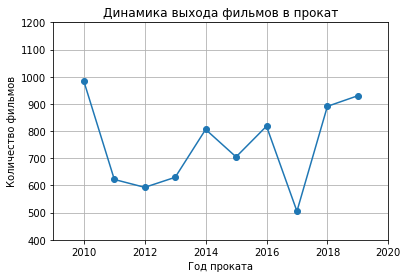

In [64]:
# строим график динамики выхода фильмов в прокат за 10 лет
data_mkrf_year_plot = (
    data_mkrf
    .pivot_table(
        index='show_start_year', 
                 values='pu_number', 
                 aggfunc='count'
                ).plot(style='o-',
                       xlim=(2009,2020),
                       ylim=(400,1200),
                       grid=True,
                       legend=False
                      ) 
)

plt.xlabel('Год проката')
plt.ylabel('Количество фильмов')
plt.title('Динамика выхода фильмов в прокат')
plt.show()

In [65]:
# считаем общую долю фильмов с указанной информацией о прокате в кинотеатрах
data_mkrf_good = data_mkrf.loc[data_mkrf['box_office']!=0]

data_mkrf_good_share= data_mkrf_good[
    'box_office'].count()/data_mkrf['box_office'].count()

print('Доля фильмов с указанной информацией о прокате составляет:',
      (data_mkrf_good_share*100).round(2),'%.')

Доля фильмов с указанной информацией о прокате составляет: 41.88 %.


In [66]:
# смотрим динамику доли фильмов с указанной информацией о прокате за 10 лет:
# формируем две группировки данных(всех фильмов и фильмов с информацией о прокате)
data_mkrf_box_good = data_mkrf_good.groupby(
    'show_start_year').agg({'box_office': ['count', 'sum']}
                          )
data_mkrf_box_all = data_mkrf.groupby(
    'show_start_year').agg({'box_office': ['count', 'sum']}
                          )
# объединяем группировки в талицу
data_mkrf_good_join = pd.merge(
    data_mkrf_box_good, 
    data_mkrf_box_all,
    on='show_start_year',
    how='left',
    suffixes=('_good', '_all')
)
# добавляем колонку с долей по годам
data_mkrf_good_join['share']= data_mkrf_good_join[
    'box_office_good']['count']/data_mkrf_good_join['box_office_all']['count']

data_mkrf_good_join

box_office_good               box_office_all                \
                          count           sum          count           sum   
show_start_year                                                              
2010                        101      2.428654            983      2.428654   
2011                        109     14.102765            622     14.102765   
2012                        123      6.955423            593      6.955423   
2013                        179     29.799707            630     29.799707   
2014                        273   7444.951920            806   7444.951920   
2015                        462  39497.365276            705  39497.365276   
2016                        525  47866.299751            818  47866.299751   
2017                        357  48563.707212            505  48563.707212   
2018                        475  49668.403121            891  49668.403121   
2019                        530  48425.709010            930  48425.709010   

                    share  
                           
show_start_year            
2010             0.102747  
2011             0.175241  
2012             0.207420  
2013             0.284127  
2014             0.338710  
2015             0.655319  
2016             0.641809  
2017             0.706931  
2018             0.533109  
2019             0.569892

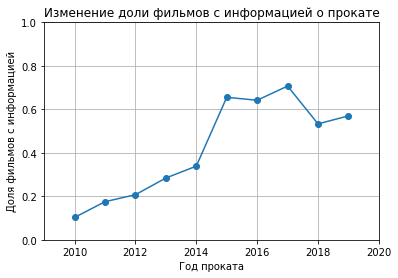

In [67]:
# строим график динамики доли фильмов с информацией о прокате за 10 лет
data_mkrf_good_join.plot(
    y='share',
    style='o-',
    xlim=(2009,2020),
    ylim=(0,1),
    grid=True,
    legend=False
);

plt.xlabel('Год проката')
plt.ylabel('Доля фильмов с информацией')
plt.title('Изменение доли фильмов с информацией о прокате')
plt.show()

#### Вывод. Информация о прокате

   - Определили, сколько фильмов выходило в прокат каждый год:
     
       	              year  film
                       2010     983
                       2011	 622
                       2012	 593
                       2013	 630
                       2014     806
                       2015	 705
                       2016	 818
                       2017	 505
                       2018	 891
                       2019	 930
                       
   - Посмотрели динамику выхода фильмов в прокат по годам:
   
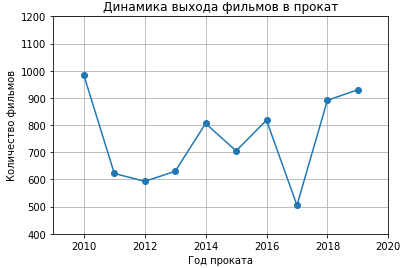
 
 
   - Посмотрели, как меняется доля фильмов с информацией о прокате год от года;
 
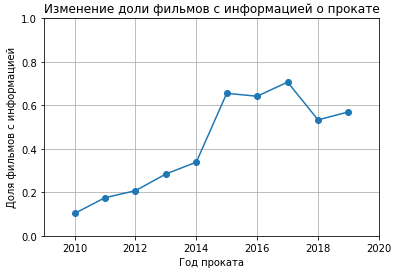


   - Посчитали **долю** фильмов **с** указанной **информацией о прокате** в кинотеатрах: 
            
      - **41.88%**'.  

- Изучим, как менялась динамика проката по годам: в каком году сумма сборов была минимальной, а в каком - максимальной.

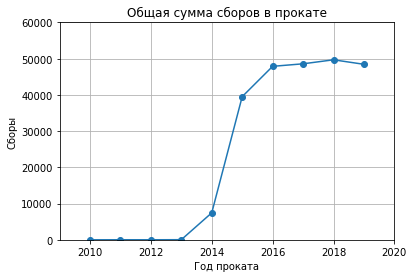

In [68]:
# смотрим на графике динамику суммы сборов за 10 лет
data_mkrf_good_join.plot(
    y=('box_office_good',
        'sum'),
    style='o-',
    xlim=(2009,2020),
    ylim=(0,60000),
    grid=True,
    legend=False
);

plt.xlabel('Год проката')
plt.ylabel('Сборы')
plt.title('Общая сумма сборов в прокате')
plt.show()

In [69]:
# смотрим суммы сборов фильмов по годам, млн.руб.
data_mkrf_good_join['box_office_all']['sum'].sort_values(ascending=False)

show_start_year
2018    49668.403121
2017    48563.707212
2019    48425.709010
2016    47866.299751
2015    39497.365276
2014     7444.951920
2013       29.799707
2011       14.102765
2012        6.955423
2010        2.428654
Name: sum, dtype: float64

#### Вывод. Информация об общих сборах

   - Посмотрели динамику сборов в прокате по годам:
   
   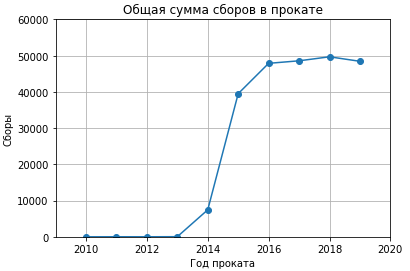
   
   
   - Посмотрели суммы сборов фильмов в прокате по годам, млн.руб.:
   
   
   
     year      sum
     2018    49668.403121
     2017    48563.707212
     2019    48425.709010
     2016    47866.299751
     2015    39497.365276
     2014     7444.951920
     2013       29.799707
     2011       14.102765
     2012        6.955423
     2010        2.428654
     
  - **Максимальная** сумма сборов была в **2018** году: **49668.403121 млн.руб.**
  - **Минимальная** сумма сборов была в **2010** году:      **2.428654 млн.руб.**

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [70]:
# считаем среднюю и медианную сумму сборов каждого года
data_mkrf_year_box = data_mkrf_good.pivot_table(
    index='show_start_year',
    values='box_office',
    aggfunc=('mean','median')
)

data_mkrf_year_box

,mean,median
show_start_year,,
2010,0.024046,0.001710
2011,0.129383,0.003000
2012,0.056548,0.006220
2013,0.166479,0.003580
2014,27.270886,0.020400
2015,85.492133,5.003450
2016,91.173904,3.915041
2017,136.032793,9.968340
2018,104.565059,8.891102


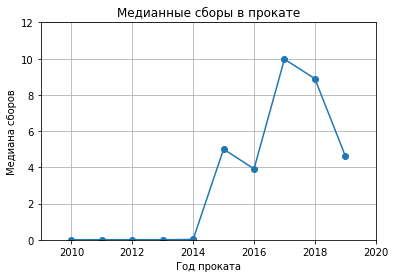

In [71]:
# строим график динамики медианы сборов за 10 лет 
data_mkrf_year_box.plot(
    y='median',
    style='o-',
    xlim=(2009,2020),
    ylim=(0,12),
    grid=True,
    legend=False
);

plt.xlabel('Год проката')
plt.ylabel('Медиана сборов')
plt.title('Медианные сборы в прокате')
plt.show()

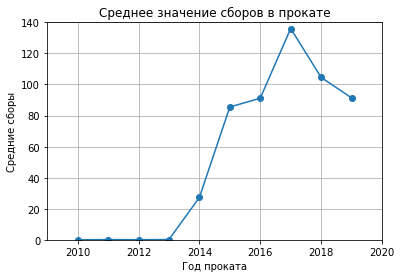

In [72]:
# строим график распределения среднего значения сборов по годам 
data_mkrf_year_box.plot(
    y='mean',
    style='o-',
    xlim=(2009,2020),
    ylim=(0,140),
    grid=True,
    legend=False
);

plt.xlabel('Год проката')
plt.ylabel('Средние сборы')
plt.title('Среднее значение сборов в прокате')
plt.show()

In [73]:
# смотрим срезы с разной верхней планкой сборов
data_mkrf_50 = data_mkrf.query(
    'box_office != 0')

data_mkrf_50 = data_mkrf_50.query(
    'box_office <50')

data_mkrf_51 = data_mkrf.query(
    'box_office >50 ')

print(data_mkrf_50['box_office'].describe())
data_mkrf_51['box_office'].describe()


count    2537.000000
mean        5.697417
std        10.029213
min         0.000040
25%         0.028150
50%         1.097314
75%         5.603217
max        49.649068
Name: box_office, dtype: float64


count     597.000000
mean      380.344012
std       437.636700
min        50.451948
25%        95.302304
50%       200.123440
75%       490.745760
max      3073.568768
Name: box_office, dtype: float64

#### Вывод. Информация о средней и медианной суммах сборов

   - Посчитали и посмотрели на графиках медианую и среднюю сумму сборов по годам 
   
   
	 
     year		mean	median
     2010	  0.024046	 0.001710
     2011	  0.129383	 0.003000
     2012	  0.056548	 0.006220
     2013	  0.166479	 0.003580
     2014	 27.270886	 0.020400
     2015	 85.492133	 5.003450
     2016	 91.173904	 3.915041 
     2017	136.032793	 9.968340
     2018	104.565059	 8.891102
     2019	 91.369262	 4.627798

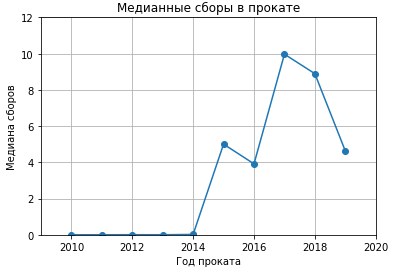


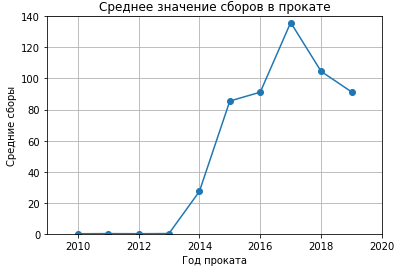



  - Большая часть фильмов (больше 80%) имеет скромные сборы (на уровне 5 млн.), а оставшиеся 20% собирают в среднем больше 300 млн. А еще есть хиты со сборами от 500 млн.. Это сильно смещает среднее значение. 

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Посмотрим, фильмы с каким возрастным ограничением собрали больше всего денег в прокате и меняется ли картина в зависимости от года. Если да, выясним, с чем это может быть связано.

In [74]:
# делаем срез данных по годам: 2015-2019, и группируем их по возрастным  
# ограничениям и суммарным сборам в прокате 
df_age_box_2015_19 = (
    data_mkrf.query(
    'show_start_year >= 2015'
)
    .pivot_table(
    index=[
        'show_start_year',
           'age_restriction'
    ]
        ,values='box_office',
        aggfunc=('count','sum'
                )
    )
)

# переименовываем колонки
df_age_box_2015_19.columns = ['title_count', 'box_office_sum']

# выводим суммарные сборы по возрастным ограничениям за весь период
print(df_age_box_2015_19.groupby(
    'age_restriction'
)[
    'box_office_sum'
 ].sum().sort_values(
    ascending=False
)
     )
print()

# выводим количество фильмов в прокате по возрастным ограничениям за весь период
print((
    data_mkrf.query(
    'show_start_year>=2015'
)
    .groupby(
        'age_restriction'
    )[
    'box_office'
]
    .count()
    .sort_values(
        ascending=False
    )
)
     )

# смотрим суммарные сборы, распределенные по годам
df_age_box_2015_19.sort_values(
    by=[
        'show_start_year',
        'box_office_sum'
    ], 
    ascending=False
)

age_restriction
16+    76034.733946
12+    60619.446875
6+     55798.610450
18+    40759.615671
0+       809.077428
Name: box_office_sum, dtype: float64

age_restriction
16+    1172
18+    1086
12+     789
6+      485
0+      317
Name: box_office, dtype: int64


title_count  box_office_sum
show_start_year age_restriction                             
2019            6+                       133    12852.548694
                16+                      266    12753.419079
                12+                      203    12680.198778
                18+                      255    10121.796391
                0+                        73       17.746066
2018            16+                      235    16503.602465
                12+                      243    14267.291722
                6+                       114    10104.974431
                18+                      222     8760.085501
                0+                        77       32.449002
2017            16+                      153    18745.042872
                6+                        66    12086.142163
                18+                      172     9651.495566
                12+                       70     7851.427676
                0+                        44      229.598936
2016            16+                      269    16664.548577
                12+                      136    12204.446598
                6+                        95    12053.145919
                18+                      245     6793.929808
                0+                        73      150.228849
2015            12+                      137    13616.082102
                16+                      249    11368.120953
                6+                        77     8701.799242
                18+                      192     5432.308405
                0+                        50      379.054574

In [75]:
# выводим максимальные суммарные сборы (и количество фильмов)
# по возрастным категориям и годам, млн.руб.
df_age_box_2015_19_rate = df_age_box_2015_19.query(
    'box_office_sum>12800 & title_count !=243'
)
df_age_box_2015_19_rate.sort_values(by='show_start_year',
    ascending=False
)

,,title_count,box_office_sum
show_start_year,age_restriction,,
2019,6+,133,12852.548694
2018,16+,235,16503.602465
2017,16+,153,18745.042872
2016,16+,269,16664.548577
2015,12+,137,13616.082102


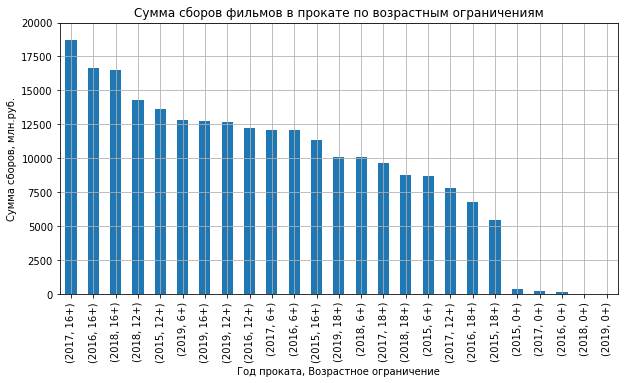

In [76]:
# строим столбчатую диаграмму 
(df_age_box_2015_19.sort_values(
    by='box_office_sum', 
    ascending=False)
 .plot(
    kind='bar',
    y='box_office_sum', 
    style='o-',
    figsize=(10,5),
    ylim=(0,20000),
    grid=True,
    legend=False 
)
);

plt.xlabel('Год проката, Возрастное ограничение')
plt.ylabel('Сумма сборов, млн.руб.')
plt.title('Сумма сборов фильмов в прокате по возрастным ограничениям')
plt.show()

- Составим рейтинг 10 фильмов с наибольшими сборами по годам.

In [77]:
# создаем функцию, возвращающую данные о 10 фильмах с наибольшими сборами
# и оцениваем возрастной ценз 
def top_titles(year):
        
    df = data_mkrf.query(
    'show_start_year == @year') 
    df_top = df[
    ['show_start_year',
        'title','box_office',
        'production_country',
        'age_restriction']]
    df_top_sort = df_top.sort_values(by='box_office', 
                                ascending=False).head(10)
    return  df_top_sort
    
years = data_mkrf.loc[data_mkrf['show_start_year']>=2015,
                      'show_start_year'].sort_values().unique()
    
for i in years:
    
    display(top_titles(i))
    print()

,show_start_year,title,box_office,production_country,age_restriction
3116,2015,Звёздные войны: Пробуждение силы,1658.861440,США,12+
2577,2015,Миньоны,1646.580608,США,6+
2158,2015,Мстители: Эра Альтрона,1500.989312,США,12+
2104,2015,Форсаж 7,1486.131072,США,16+
2578,2015,Мир Юрского периода,1211.159040,США,12+
2508,2015,Терминатор: Генезис,1060.054272,США,12+
3171,2015,Выживший (2015),1006.737152,США,18+
2510,2015,Монстры на каникулах 2,1000.157184,США,6+
2494,2015,Головоломка. Лава,963.742528,США,6+
1896,2015,Дом _,828.885056,США,6+


,show_start_year,title,box_office,production_country,age_restriction
2858,2016,Зверополис,2048.126080,США,6+
3754,2016,Тайная жизнь домашних животных. Миньоны против...,1971.005056,США,6+
2839,2016,Дэдпул,1587.516416,США - Канада,18+
3395,2016,Отряд самоубийц,1570.380288,США,16+
2919,2016,Экипаж .,1402.255360,Россия,6+
3333,2016,Фантастические твари и где они обитают,1398.264704,США - Великобритания,12+
2990,2016,Варкрафт,1307.254144,США - Канада - Япония - КНР,12+
3317,2016,Доктор Стрэндж,1288.356736,США,16+
2937,2016,Книга джунглей (2016),1216.781440,США,12+
3564,2016,Притяжение (2016),1038.321472,Россия,12+


,show_start_year,title,box_office,production_country,age_restriction
5652,2017,Движение вверх,2779.686144,Россия,6+
3487,2017,Пираты Карибского моря: Мертвецы не рассказыва...,2118.396160,США,16+
5504,2017,Последний богатырь,1655.037696,Россия,12+
3522,2017,Стражи Галактики. Часть 2,1468.779648,США,16+
3370,2017,Форсаж 8,1429.976832,США,12+
3741,2017,Гадкий я 3,1390.392576,США,6+
3234,2017,Босс-Молокосос,1376.726784,США,6+
5653,2017,Джуманджи: Зов джунглей,1246.587904,США,16+
5547,2017,Тор: Рагнарёк,1229.588224,США,16+
5472,2017,Оно,1036.725440,США,18+


,show_start_year,title,box_office,production_country,age_restriction
6548,2018,Т-34,2271.753984,Россия,12+
6273,2018,Веном,1913.257984,США,16+
5863,2018,Мстители: Война бесконечности,1875.989760,США,16+
6469,2018,Полицейский с рублевки. Новогодний беспредел,1682.680064,Россия,16+
6391,2018,Фантастические твари: Преступления Грин-де-Вальда,1520.626560,США - Великобритания,12+
5707,2018,Лёд,1445.731840,Россия,12+
6500,2018,Аквамен,1278.044160,США - Австралия,12+
5875,2018,Дэдпул 2,1236.762624,США,18+
6015,2018,Монстры на каникулах 3: Море зовёт,1125.242880,США,6+
5895,2018,Мир Юрского периода 2,1096.832512,США - Испания,12+


,show_start_year,title,box_office,production_country,age_restriction
7455,2019,Холоп,3073.568768,Россия,12+
6819,2019,Мстители: Финал,2576.613888,США,16+
7215,2019,Малефисента: Владычица тьмы,1911.944832,США,6+
7257,2019,Джокер,1890.368128,США - Канада,18+
7382,2019,Холодное сердце II,1827.244672,США,6+
6714,2019,Как приручить дракона 3,1689.540864,США,6+
6956,2019,Тайная жизнь домашних животных 2,1478.921216,"США, Франция, Япония",6+
7056,2019,Человек-Паук: Вдали от дома,1203.696000,США,12+
6727,2019,Капитан Марвел,1144.426240,США,16+
7108,2019,Однажды... в Голливуде,1121.948928,США - Великобритания - КНР,18+


In [78]:
# делаем срез данных по годам: 2015-2019, и группируем их по возрастным  
# ограничениям и средним сборам в прокате 
df_age_box_2015_19_mean = (
    data_mkrf.query(
    'show_start_year >= 2015'
)
    .pivot_table(
    index=[
        'show_start_year',
           'age_restriction'
    ]
        ,values='box_office',
        aggfunc=('count','mean'
                )
    )
)

# переименовываем колонки
df_age_box_2015_19_mean.columns = ['title_count', 'box_office_mean']

# выводим средние сборы по возрастным ограничениям за весь период
print(df_age_box_2015_19_mean.groupby(
    'age_restriction'
)[
    'box_office_mean'
 ].sum().sort_values(
    ascending=False
)
     )
print()

# выводим количество фильмов в прокате по возрастным ограничениям за весь период
print((
    data_mkrf.query(
    'show_start_year>=2015'
)
    .groupby(
        'age_restriction'
    )[
    'box_office'
]
    .count()
    .sort_values(
        ascending=False
    )
)
     )

# смотрим средние сборы, распределенные по годам
df_age_box_2015_19_mean.sort_values(
    by=[
        'show_start_year',
        'box_office_mean'
    ], 
    ascending=False
)

age_restriction
6+     608.284797
12+    422.466459
16+    348.294999
18+    191.290109
0+      15.521691
Name: box_office_mean, dtype: float64

age_restriction
16+    1172
18+    1086
12+     789
6+      485
0+      317
Name: box_office, dtype: int64


title_count  box_office_mean
show_start_year age_restriction                              
2019            6+                       133        96.635704
                12+                      203        62.464033
                16+                      266        47.945185
                18+                      255        39.693319
                0+                        73         0.243097
2018            6+                       114        88.640127
                16+                      235        70.228096
                12+                      243        58.713135
                18+                      222        39.459845
                0+                        77         0.421416
2017            6+                        66       183.123366
                16+                      153       122.516620
                12+                       70       112.163253
                18+                      172        56.113346
                0+                        44         5.218158
2016            6+                        95       126.875220
                12+                      136        89.738578
                16+                      269        61.949995
                18+                      245        27.730326
                0+                        73         2.057929
2015            6+                        77       113.010380
                12+                      137        99.387461
                16+                      249        45.655104
                18+                      192        28.293273
                0+                        50         7.581091

In [79]:
# выводим максимальные cредние сборы (и количество фильмов)
# по возрастным категориям и годам, млн.руб.
df_age_box_2015_19_rate_mean = df_age_box_2015_19_mean.query(
    'age_restriction == "6+"'
)
df_age_box_2015_19_rate_mean.sort_values(by='show_start_year',
    ascending=False
)

,,title_count,box_office_mean
show_start_year,age_restriction,,
2019,6+,133,96.635704
2018,6+,114,88.640127
2017,6+,66,183.123366
2016,6+,95,126.875220
2015,6+,77,113.010380


In [80]:
# делаем срез данных по годам: 2015-2019, и группируем их по возрастным  
# ограничениям и медианным сборам в прокате 
df_age_box_2015_19_median = (
    data_mkrf.query(
    'show_start_year >= 2015'
)
    .pivot_table(
    index=[
        'show_start_year',
           'age_restriction'
    ]
        ,values='box_office',
        aggfunc=('count','median'
                )
    )
)

# переименовываем колонки
df_age_box_2015_19_median.columns = ['title_count', 'box_office_median']

# выводим медианные сборы по возрастным ограничениям за весь период
print(df_age_box_2015_19_median.groupby(
    'age_restriction'
)[
    'box_office_median'
 ].sum().sort_values(
    ascending=False
)
     )
print()

# выводим количество фильмов в прокате по возрастным ограничениям за весь период
print((
    data_mkrf.query(
    'show_start_year>=2015'
)
    .groupby(
        'age_restriction'
    )[
    'box_office'
]
    .count()
    .sort_values(
        ascending=False
    )
)
     )

# смотрим медианные сборы, распределенные по годам
df_age_box_2015_19_median.sort_values(
    by=[
        'show_start_year',
        'box_office_median'
    ], 
    ascending=False
)


age_restriction
18+    14.664983
6+     12.159397
16+     9.231488
0+      1.630427
12+     0.355081
Name: box_office_median, dtype: float64

age_restriction
16+    1172
18+    1086
12+     789
6+      485
0+      317
Name: box_office, dtype: int64


title_count  box_office_median
show_start_year age_restriction                                
2019            18+                      255           2.497044
                6+                       133           1.384241
                16+                      266           1.148359
                0+                        73           0.000000
                12+                      203           0.000000
2018            18+                      222           4.708034
                6+                       114           3.248204
                16+                      235           1.881098
                0+                        77           0.000000
                12+                      243           0.000000
2017            6+                        66           5.768688
                18+                      172           5.510865
                16+                      153           4.856233
                12+                       70           0.240217
                0+                        44           0.000000
2016            16+                      269           0.763958
                18+                      245           0.685838
                6+                        95           0.587178
                12+                      136           0.110414
                0+                        73           0.042860
2015            0+                        50           1.587567
                18+                      192           1.263203
                6+                        77           1.171086
                16+                      249           0.581840
                12+                      137           0.004450

In [81]:
# выводим таблицу с максимальными медианными сборами по 
# возрастным категориям и по годам проката
list = (255,222,66,269,50)
df_age_box_2015_19_median[
    df_age_box_2015_19_median[
        'title_count'
    ].isin((list))
]

,,title_count,box_office_median
show_start_year,age_restriction,,
2015,0+,50,1.587567
2016,16+,269,0.763958
2017,6+,66,5.768688
2018,18+,222,4.708034
2019,18+,255,2.497044


#### Вывод. Влияние возрастных ограничений на прокат 2015-2019гг 

   - **Оценили влияние** возрастных **ограничений** аудитории **на сборы** в прокате в период **2015-2019гг:**


    age_restriction    box_office
               16+    76034.733946
               12+    60619.446875
                6+    55798.610450
               18+    40759.615671
                0+      809.077428
 
   - Рассчитали **количество фильмов** по возрастным ограничениям за период **2015-2019гг:**
   
          age_restriction   count
                      16+    1172
                      18+    1086
                      12+     789
                       6+     485
                       0+     317
               
               
   - **Лидеры по сборам** - это фильмы **'16+'**(старшие подростки), на **втором** месте - **'12+**(подростки), **замыкает** пятерку детская аудитория - **'0+'**               


   - **Каждый год** ситуация разная: **самую большую кассу** в **2019, 2015 и период 2016-2018** **собрали фильмы с разным возрастным ограничением**:   
            year   age_restriction  box_office_max
            2019	 6+	            12852.548694
            2018	16+	            16503.602465
            2017	16+	            18745.042872
            2016	16+	            16664.548577
            2015	12+	            13616.082102

 
   - На графике видно, что за весь период **в тройке лидеров** по сборам - фильмы **'16+' 2017-2016-2018гг.**

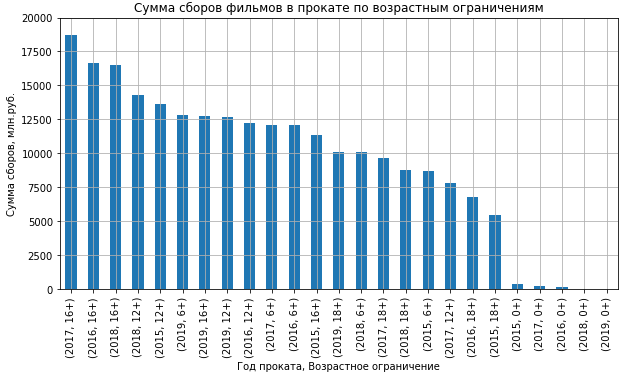


   - Посчитали влияние возрастных ограничений по среднему и медианному значению:
       
                    	                 box_office_mean
                     year  age	 count	
                     2019	6+	  133	   96.635704
                     2018	6+	  114	   88.640127
                     2017	6+	   66	  183.123366
                     2016	6+	   95	  126.875220
                     2015	6+	   77	  113.010380

                                         box_office_median
                     year   age      count
                     2019	18+	   255	    2.497044
                     2018	18+	   222	    4.708034
                     2017	 6+	    66    	5.768688
                     2016	16+	   269	    0.763958
                     2015	 0+	    50	    1.587567
 
 
   - Если считать **по среднему** - каждый год по сборам **лидируют** фильмы категории **'6+'**. Значит каждый фильм этой категории в среднем собрал большую кассу, чем фильмы из других возрастных категорий. 


   - Если оценивать **по медианному** значению, картина иная: в **разные годы** лидерами наибольшую кассу собирали фильмы **разной возрастной категории**. Видимо, сказывается влияние выходивших в эти годы топов.  


   - По **списку топ-10** фильмов по сборам в **прокате** видно (особенно по 2019 и 2015 году), что **самыми кассовыми** в разные годы **становились фильмы с разным возрастным ограничением**;
   
   
   - **Сборы** напрямую **зависят** от **популярности фильмов** среди зрителей, а год от года **популярными** **становятся фильмы** для **разной возрастной категории**. В этом **причина** того, что **суммарные сборы** в прокате каждый год имеют фильмы с **разным возрастным цензом**;
   
   
   - При этом количество фильмов определенной возрастной категории не имеет такого влияния на общие сборы категории, как сборы конкретных фильмов, особенно хитов. Другими словами, объем той или иной аудитории и количество фильмов, предлагаемых за год этой аудитории - не важны. Важно - нравится ли аудитории тот или иной фильм. Если нравится, заполняемость залов, а, следовательно, и касса категории, растут, если не нравится - ситуация обратная. 

### Исследование фильмов, получивших государственную поддержку

- Найдем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы и какой у них рейтинг.

In [82]:
# исследуем фильмы с гос.поддержкой:
# добавим колонку с суммой гос.поддержки
data_mkrf['support_total'] = data_mkrf['refundable_support']+data_mkrf['nonrefundable_support']

# колонку с окупаемостью (выручка/бюджет)
data_mkrf['budget_payback'] = data_mkrf['box_office']/data_mkrf['budget']

# и колонку с окупаемостью по выделенным средствам гос.поддержки (выручка/гос.поддержка)
data_mkrf['support_payback'] = data_mkrf['box_office']/data_mkrf['support_total']

In [83]:
# сделаем срез данных (выберем фильмы с гос.поддержкой)
data_mkrf_supp = data_mkrf.query('support_total!=0')

In [84]:
# оставим в таблице только нужные столбцы
data_mkrf_supp = data_mkrf_supp[['pu_number',
                                 'box_office',
                                 'title','type',
                                 'film_studio',
                                 'production_country',
                                 'producer',
                                 'age_restriction',
                                 'refundable_support',
                                 'nonrefundable_support',
                                 'budget',
                                 'financing_source',
                                 'ratings',
                                 'show_start_year',
                                 'genre',
                                 'director_name',
                                 'support_share',
                                 'support_total',
                                 'budget_payback',
                                'support_payback'
                                ]
                               ]

In [85]:
# находим основные параметры гос.поддержки
print(data_mkrf_supp['support_total'].describe())
print()
print('Общая сумма выделенных средств за 10 лет:',data_mkrf_supp['support_total'].sum(),'млн.руб.')
print('Общая доля гос.поддержки в бюджете фильмов с гос.поддержкой за 10 лет:',
      (data_mkrf_supp['support_total'].sum()/data_mkrf_supp['budget'].sum()*100).round(2),
      '%.')

count    332.000000
mean      60.845447
std       72.755459
min        3.000000
25%       25.333750
50%       35.000000
75%       60.000000
max      500.000000
Name: support_total, dtype: float64

Общая сумма выделенных средств за 10 лет: 20200.688316 млн.руб.
Общая доля гос.поддержки в бюджете фильмов с гос.поддержкой за 10 лет: 46.3 %.


In [86]:
# из фильмов с гос.поддержкой выбираем только те, для которых известна сумма сборов 
data_mkrf_supp_good = data_mkrf_supp.query('box_office!=0')

In [87]:
# смотрим основные стат.параметры
data_mkrf_supp_good.describe()

,pu_number,box_office,refundable_support,nonrefundable_support,budget,ratings,show_start_year,support_share,support_total,budget_payback,support_payback
count,3.180000e+02,318.000000,318.000000,318.000000,318.000000,303.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,1.112923e+08,132.432420,11.946541,48.780404,132.006722,6.020462,2016.654088,0.542581,60.726944,0.825824,1.877601
std,8.763166e+05,334.837859,24.817662,57.792391,184.957587,1.156687,1.621961,0.197753,69.705240,1.687637,4.317110
min,1.110001e+08,0.001550,0.000000,0.000000,6.000000,1.000000,2013.000000,0.044043,4.700000,0.000017,0.000044
25%,1.110048e+08,1.236676,0.000000,25.000000,46.153858,5.350000,2015.000000,0.377404,26.000000,0.023373,0.040562
50%,1.110102e+08,15.720067,0.000000,30.000000,74.955000,6.200000,2016.000000,0.614038,35.000000,0.176420,0.439611
75%,1.110173e+08,106.373010,15.000000,44.125000,150.006432,6.700000,2018.000000,0.662463,60.000000,0.968960,1.715664
max,1.140100e+08,3073.568768,180.000000,400.000000,2305.074176,9.400000,2019.000000,1.000000,500.000000,19.209805,51.226146


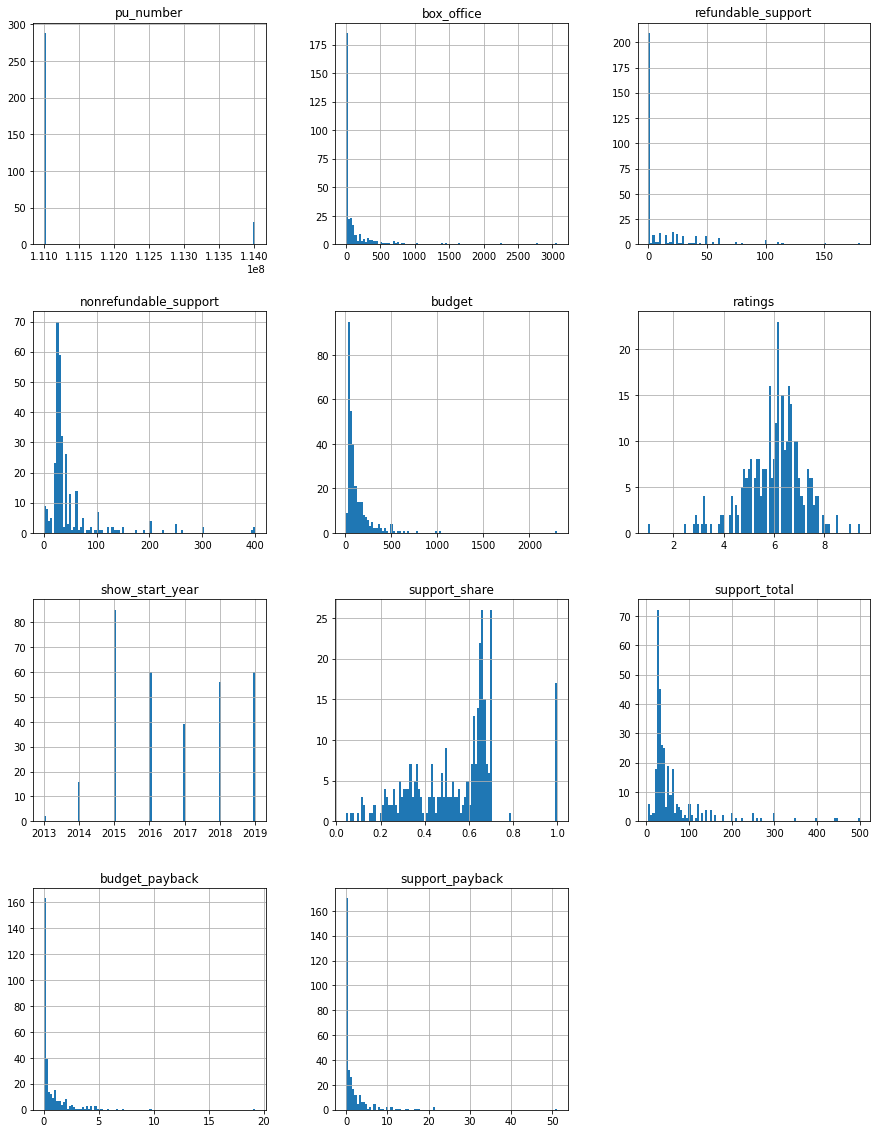

In [88]:
#строим первые общие графики
data_mkrf_supp_good.hist(bins=100,figsize=(15,20));

In [89]:
# смотрим долю гос.поддержки и общую окупаемость
print('Общая доля гос.поддержки в сборах фильмов с господдержкой за 10 лет:',
      (data_mkrf_supp_good['support_total'].sum()/data_mkrf_supp_good['box_office'].sum()*100).round(2),
      '%.')
print('Общая окупаемость (сборы/бюджет) фильмов с господдержкой за 10 лет:',
      (data_mkrf_supp_good['box_office'].sum()/data_mkrf_supp_good['budget'].sum()*100).round(2),
      '%.')
print('Средняя окупаемость (сборы/бюджет) фильмов с господдержкой за 10 лет:',
      (data_mkrf_supp_good['budget_payback'].mean()*100).round(2),
      '%.')
print()
print('Общая окупаемость (сборы/господдержка) средств господдержки за 10 лет:',
      (data_mkrf_supp_good['box_office'].sum()/data_mkrf_supp_good['support_payback'].sum()*100).round(2),
      '%.')

Общая доля гос.поддержки в сборах фильмов с господдержкой за 10 лет: 45.86 %.
Общая окупаемость (сборы/бюджет) фильмов с господдержкой за 10 лет: 100.32 %.
Средняя окупаемость (сборы/бюджет) фильмов с господдержкой за 10 лет: 82.58 %.

Общая окупаемость (сборы/господдержка) средств господдержки за 10 лет: 7053.28 %.


#### Вывод. Общие данные

   - **Отфильтровали** данные (оставили **только ненулевые значения** в поле **господдержки** и **фильмы**, с известной **суммой сборов**); 
   
   - Рассчитали и **добавили столбцы**: **'support_total'** - с **суммой господдержки**; **'budget_payback'** - с окупаемостью (**выручка/бюджет**); **'support_payback'** - с окупаемостью по выделенным средствам гос.поддержки (**выручка/господдержка**); оставили в датафрейме только нужные столбцы;
   
   - Посчитали основные параметры общую господдержки:
   
          count      332.000000
           mean       60.845447
            std       72.755459
            min        3.000000
            25%       25.333750
            50%       35.000000 
            75%       60.000000
            max      500.000000
   
   - Сделали первые выводы:
               
     - Общая **сумма выделенных средств** за 10 лет: **20200.688316 млн.руб**.
            
     - Общая **доля господдержки в бюджете** фильмов с господдержкой за 10 лет: **46.3 %.**
   
   
   - Построили графики числовых колонок и изучили первые данные:
      
      - Интересные особенности: 

        - **Основная масса** фильмов собирает в прокате (**'box_office'**) - **до 500 млн.руб.** Медиана - 15,7 млн.руб. **Среднее - 132.42 млн.руб.**

        - Что почти совпадает со **средним** бюджетом фильмов (**'budget'**)  - **132.00 млн.руб.**, и **бюджет** большинства фильмов также лежит в пределах **до 500 млн.руб.**, из чего можно заключить, что **большинство фильмов не окупается в прокате**.

        - Обращает на себя внимание, что **суммы** выделяемых студиям **возвратных средств** (**'refundable_support'**) гораздо **ниже**, чем **невозвратные** **'nonrefundable_support'** суммы. Возможно, это связано с условиями договора, в котором прописывается участие инвестора в будущей прибыли. Но **выглядит странно**, учитывая то, что **фильмы** в среднем **собирают** в прокате **больше**, чем выделяемая **сумма господдержки**. **Средняя сумма** господдержки - **48 млн.руб**. 

        - Самый **частый рейтинг** на Кинопоиске (**'ratings'**) - **6**, что говорит о **невысокой популярности** фильмов с господдержкой в основной своей массе.  

        - **Больше всего** фильмов поддерживалось **в 2015 году** (**'show_start_year'**), потом - спад, странная **яма в 2017г.** и снова - подъем.

        - **Большинство** фильмов **получали** господдержку в районе **60-70%%** **от** суммы **бюджета**. Но **есть** внушительный **пик** в районе **100%**.  

        - Картина **общей суммы господдержки** (**'support_total'**) **похожа** на ситуацию с **невозвратными средствами**. Неудивительно, учитывая, что **общий объем невозвратных средств** господдержки значительно **выше**, чем **объем возвратных**. 
        
        - **Средняя окупаемость по бюджету** фильмов (**'budget_payback'**) - **83%**, при **медиане 18%**. Что подтверждает тезис о том, что **большинство фильмов не окупились в прокате**. 

        - С **окупаемостью по господдержке** (**'support_payback**) **картина**, ожидаемо, **другая** - **окупаемость** значительно **выше** (в 2 раза), чем по бюджету, **хотя** в большинстве случаев и **не дотягивает до 100%**.  

     - **Общая доля господдержки в сборах** фильмов с господдержкой за 10 лет: **45.86 %**.

     - **Общая окупаемость** (**сборы/бюджет**) фильмов с господдержкой за 10 лет: **100.32 %**.

     - **Средняя окупаемость** (**сборы/бюджет**) фильмов с господдержкой за 10 лет: **82.58 %**.

     - **Общая окупаемость** (**сборы/господдержка**) средств господдержки за 10 лет: **7053.28 %**.

In [90]:
# смотрим распределение господдержки по годам, млн.руб.
data_mkrf_supp.pivot_table(
    index='show_start_year',
    values='support_total',
    aggfunc='sum',
    margins=True
)

,support_total
show_start_year,
2013,134.347944
2014,572.002300
2015,3656.241459
2016,4303.155480
2017,3183.971661
2018,3446.969472
2019,4904.000000
All,20200.688316


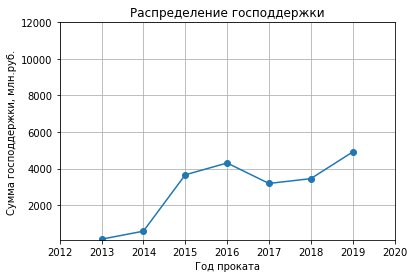

In [91]:
# строим график распределения господдержки по годам, млн.руб.
(data_mkrf_supp.pivot_table(
    index='show_start_year',
    values='support_total',
    aggfunc='sum'
)
.plot(y='support_total',
    style='o-',
    xlim=(2012,2020),
    ylim=(100,12000),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.title('Распределение господдержки')
plt.show()

In [92]:
# смотрим количество фильмов с господдержкой по годам, млн.руб.
data_mkrf_supp.pivot_table(
    index='show_start_year',
    values='support_total',
    aggfunc='count',
    margins=True
)

,support_total
show_start_year,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70
All,332


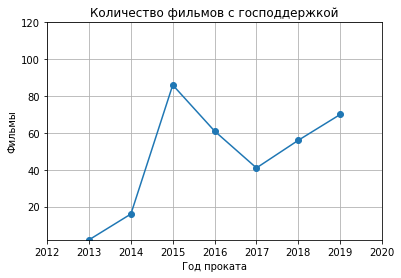

In [93]:
# строим график количества фильмов с господдержкой по годам, млн.руб.
(data_mkrf_supp.pivot_table(
    index='show_start_year',
    values='support_total',
    aggfunc='count'
)
.plot(y='support_total',
    style='o-',
    xlim=(2012,2020),
    ylim=(2,120),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Фильмы')
plt.title('Количество фильмов с господдержкой')
plt.show()

In [94]:
# находим долю гос.поддержки в сборах фильмов с господдержкой за каждый год
def supp_box(year):
        
    dt = data_mkrf_supp_good.query(
    'show_start_year == @year') 
    dt_supp_box = (
        dt['support_total'
        ].sum()/dt['box_office'
        ].sum()*100).round(2)
    
    return dt_supp_box
    
years = data_mkrf_supp_good['show_start_year'].sort_values().unique()
    
for i in years:
    
    display(F'Общая доля господдержки в сборах фильмов с господдержкой за {i} год: {supp_box(i)} %.')

'Общая доля господдержки в сборах фильмов с господдержкой за 2013 год: 661.08 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2014 год: 56.22 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2015 год: 62.77 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2016 год: 70.57 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2017 год: 28.98 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2018 год: 34.7 %.'

'Общая доля господдержки в сборах фильмов с господдержкой за 2019 год: 48.59 %.'

In [95]:
# выведем строки за 2013 год
display(data_mkrf_supp_good.query(
    'show_start_year == 2013'))

,pu_number,box_office,title,type,film_studio,production_country,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,show_start_year,genre,director_name,support_share,support_total,budget_payback,support_payback
1281,111005313,0.365354,Пока еще жива,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26.500000,79.411904,Министерство культуры,8.1,2013,драма,А.Атанесян,0.333703,26.500000,0.004601,0.013787
1498,111004213,19.957032,Невидимки,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107.847944,176.023488,Фонд кино,5.3,2013,комедия,Р.Давлетьяров,0.612691,107.847944,0.113377,0.185048


In [96]:
# смотрим окупаемость фильмов с господдержкой по годам
data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='budget_payback'
)

,budget_payback
show_start_year,
2013,0.058989
2014,0.614135
2015,0.621609
2016,0.697296
2017,1.033974
2018,1.161494
2019,0.877077


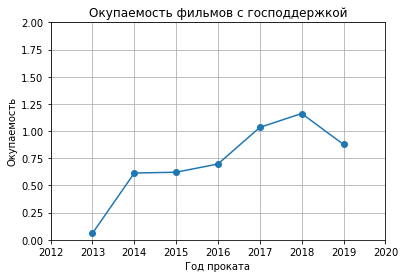

In [97]:
# строим график окупаемости фильмов с господдержкой по годам
(data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='budget_payback'
)
.plot(y='budget_payback',
    style='o-',
    xlim=(2012,2020),
    ylim=(0,2),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Окупаемость')
plt.title('Окупаемость фильмов с господдержкой')
plt.show()

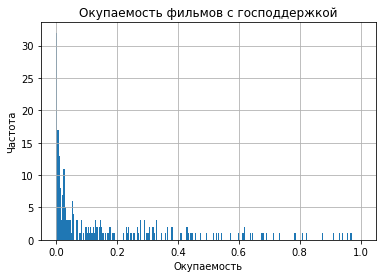

In [98]:
# смотрим гистограмму окупаемости фильмов с господдержкой за весь период
data_mkrf_supp_good[
    'budget_payback'
].hist(
    bins=250,
    range=(0,1) # отсекаем хвост редких значений   
);

plt.xlabel('Окупаемость')
plt.ylabel('Частота')
plt.title('Окупаемость фильмов с господдержкой')
plt.show()

#### Вывод. Годовая динамика. Окупаемость

   - Вывели **распределение** выделяемых средств **господдержки по годам**: 
   
          
         year	sum support
         2013	 134.347944
         2014	 572.002300
         2015	3656.241459
         2016	4303.155480
         2017	3183.971661
         2018	3446.969472
         2019	4904.000000
          All  20200.688316
   
   - и построили график:
   
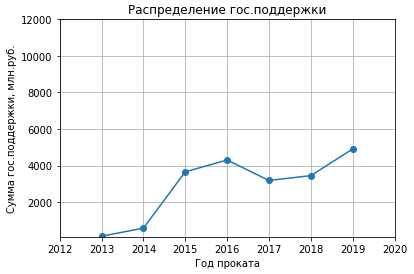
   
  
  - С 2013 по 2019 год **общая сумма господдержки** в целом **растет**, несмотря на небольшое падение 2017-2018 годах. То же с количествами фильмов, которым выделяется господдержка: **количество** в целом **растет** - **2 в 2013** году против **70 в 2019**. Пиковое значение наблюдается **в 2015 году - 86 фильмов**, тогда как сумма выделенных средств не самая большая. 
  
           
         year  count support	
         2013	           2
         2014	          16
         2015	          86
         2016	          61
         2017	          41
         2018              56
         2019	          70
          All	         332
   
   
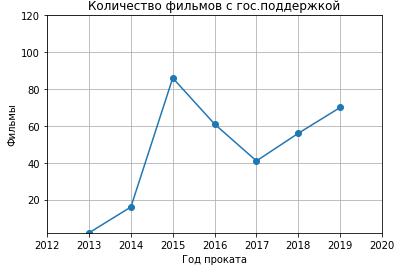   
 
 
 - **Доля** гос.поддержки **в сборах**:
 
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2013 год: 661.08 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2014 год: 56.22 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2015 год: 62.77 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2016 год: 70.57 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2017 год: 28.98 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2018 год: 34.7 %.**
   
   - Общая доля господдержки в сборах фильмов с гос.поддержкой за **2019 год: 48.59 %.**
   
   
 -  Разобрали **окупаемость** фильмов с господдержкой **по годам**:
 
 
                         
                   year	budget_payback
                   2013	      0.058989
                   2014	      0.614135
                   2015	      0.621609
                   2016	      0.697296
                   2017	      1.033974
                   2018	      1.161494
                   2019	      0.877077
                   
                   
                   
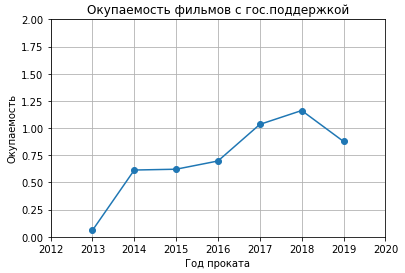


 - **Доля окупаемости** фильмов **растет**, **но** показатель **100% и выше** наблюдается **только в 2017 и 2018 годах**. 
 
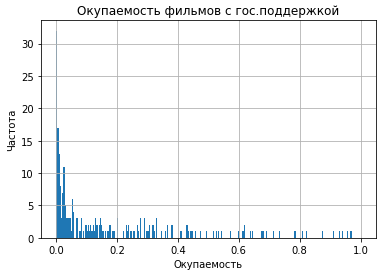

 - Это подтверждается и гистограммой: **большинство фильмов с господдержкой не окупается в прокате**. 

In [99]:
# смотрим динамику сборов фильмов с господдержкой по годам, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='box_office',
    aggfunc='sum',
    margins=True
)

,box_office
show_start_year,
2013,20.322386
2014,1017.422188
2015,5785.285394
2016,6081.707808
2017,10865.075371
2018,9934.068989
2019,8409.627554
All,42113.509689


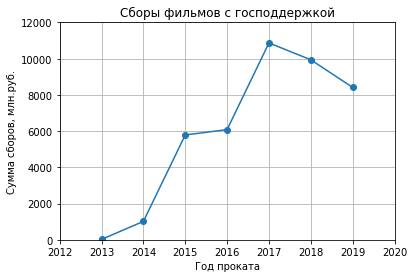

In [100]:
# строим график динамики сборов фильмов с господдержкой по годам, млн.руб.
(data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='box_office',
    aggfunc='sum'
)
.plot(y='box_office',
    style='o-',
    xlim=(2012,2020),
    ylim=(0,12000),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Сумма сборов, млн.руб.')
plt.title('Сборы фильмов с господдержкой')
plt.show()

In [101]:
# смотрим изменение среднего рейтинга фильмов с господдержкой по годам
data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='ratings',
    
)

,ratings
show_start_year,
2013,6.700000
2014,6.006667
2015,6.137805
2016,5.653572
2017,5.989189
2018,6.001887
2019,6.225862


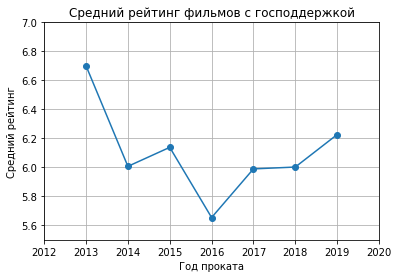

In [102]:
# строим график изменения среднего рейтинга фильмов с господдержкой по годам
(data_mkrf_supp_good.pivot_table(
    index='show_start_year',
    values='ratings',
    
)
.plot(y='ratings',
    style='o-',
    xlim=(2012,2020),
    ylim=(5.5,7),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг фильмов с господдержкой')
plt.show()

In [103]:
# смотрим изменение среднего рейтинга фильмов без господдержки по годам
data_mkrf.loc[data_mkrf[
    'budget']==0].pivot_table(
    index='show_start_year',
    values='ratings'
)

,ratings
show_start_year,
2010,6.726483
2011,6.530729
2012,6.545156
2013,6.513081
2014,6.531586
2015,6.357778
2016,6.424128
2017,6.344836
2018,6.429043


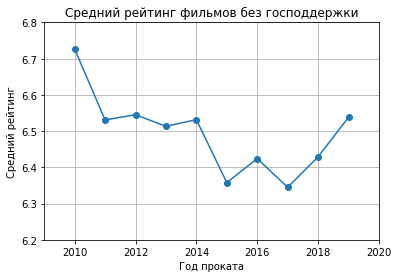

In [104]:
# строим график изменения среднего рейтинга фильмов без господдержки по годам 
(data_mkrf.loc[data_mkrf[
    'budget']==0].pivot_table(
    index='show_start_year',
    values='ratings'
) 
.plot(y='ratings',
    style='o-',
    xlim=(2009,2020),
    ylim=(6.2,6.8),
    grid=True,
    legend=False  
)
);

plt.xlabel('Год проката')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг фильмов без господдержки')
plt.show()

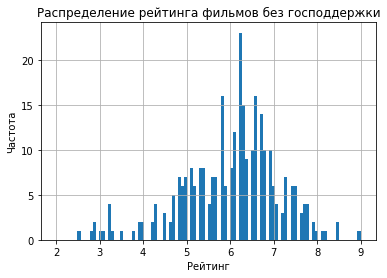

In [105]:
# смотрим распределение фильмов по рейтингу на гистограмме
data_mkrf_supp_good[
    'ratings'
].hist(
    bins=100,
    range=(2,9)
);

plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.title('Распределение рейтинга фильмов без господдержки')
plt.show()

#### Вывод. Динамика сборов. Рейтинг


   - Вывели **сборы фильмов с господдержкой в прокате  **по годам**, млн.руб.:
  
         	          box_office
              year	
              2013	    20.322386
              2014	  1017.422188
              2015	  5785.285394
              2016	  6081.707808
              2017	 10865.075371
              2018	  9934.068989
              2019      8409.627554
               All	 42113.509689

   
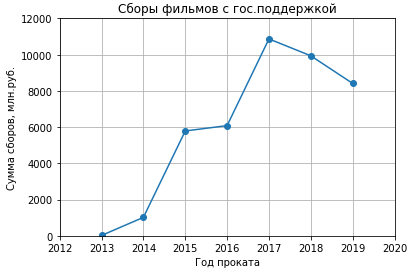


   - **Сборы** год от года **растут**. **Максимальная сумма** - 10865.075371 млн.руб., была собрана **в 2017 году**. В 2018 и 2019 году наблюдалось предсказуемое падение - в связи с пандемией. 
 
   
   - Посчитали **изменение среднего рейтинга** фильмов с господдержкой **по годам**:
           
                  ratings
         year	
         2013	6.700000
         2014	6.006667
         2015	6.137805
         2016	5.653572
         2017	5.989189 
         2018	6.001887
         2019	6.225862
 
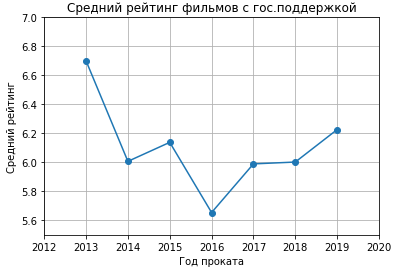



   - **Максимальные значения** рейтинга фильмов с господдержкой наблюдались (у двух фильмов) **в 2013 году**. Затем **три года** подряд **рейтинги падали**. **С 2017** наметился **рост**. Тем не менее, уровня **2013 года** они **не достигли**.


   - Сравнили с рейтингами фильмов без господдержки:
 
                 ratings
          year	
          2010	6.726483
          2011	6.530729
          2012	6.545156
          2013	6.513081
          2014	6.531586
          2015	6.357778
          2016	6.424128
          2017	6.344836
          2018	6.429043
          2019	6.538333

 
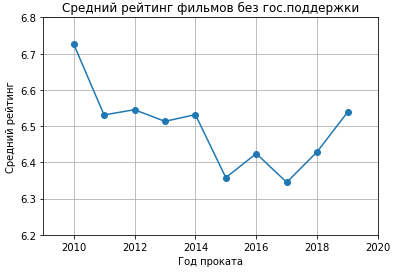


   - **В 2013** **рейтинги** фильмов **с господдержкой** были **выше**. В **остальные годы** фильмы **без господдержки** **пользовались** большей **зрительской симпатией**.

In [106]:
# смотрим изменения суммы сборов фильмов с господдержкой по возрастным ограничениям
# и годам проката, млн.руб.
data_mkrf_supp_good_age = data_mkrf_supp_good.pivot_table(
    index=[
        'show_start_year',
           'age_restriction'
    ],
    values='box_office',
    aggfunc=('count','sum')
).sort_values(
    by=['show_start_year','sum'],
    ascending=False
)

data_mkrf_supp_good_age

count          sum
show_start_year age_restriction                    
2019            12+                 15  4559.753990
                6+                  17  2047.100033
                16+                 23  1603.183491
                18+                  5   199.590040
2018            12+                 18  5883.937270
                16+                 19  2193.975133
                6+                  10  1761.506480
                18+                  9    94.650107
2017            6+                   9  5464.848709
                12+                 14  4027.989692
                16+                 11  1045.648996
                0+                   1   206.478192
                18+                  4   120.109782
2016            12+                 24  2817.273262
                6+                  11  2005.249220
                16+                 21  1257.426538
                18+                  3     1.099917
                0+                   1     0.658870
2015            12+                 23  2201.135939
                6+                  17  1984.061559
                16+                 39  1544.961760
                18+                  5    55.065095
                0+                   1     0.061040
2014            12+                  5   447.916664
                0+                   2   345.734666
                6+                   1   121.225632
                18+                  2    89.643790
                16+                  6    12.901436
2013            12+                  1    19.957032
                16+                  1     0.365354

In [107]:
# выводим лидеров по сборам по годам и возрастным категориям
df_age_pt = data_mkrf_supp_good.pivot_table(
    index=[
        'show_start_year'
    ],
    columns='age_restriction',
    values='box_office',
    aggfunc=('sum'),
    fill_value=0
)

print(df_age_pt)
print()

# имщем максимумы во возрасту 
df_age_pt_idxmax = df_age_pt.idxmax(axis=1)
print(df_age_pt_idxmax)
print()

# ищем максимумы по сборам 
df_age_pt_max = df_age_pt.max(axis=1)
print(df_age_pt_max)

# объединяем результаты
df_age_pt_join = pd.concat(
    [df_age_pt_idxmax, 
     df_age_pt_max], 
    axis =1, 
    keys=['age','sum']
)
df_age_pt_join

age_restriction          0+          12+          16+         18+           6+
show_start_year                                                               
2013               0.000000    19.957032     0.365354    0.000000     0.000000
2014             345.734666   447.916664    12.901436   89.643790   121.225632
2015               0.061040  2201.135939  1544.961760   55.065095  1984.061559
2016               0.658870  2817.273262  1257.426538    1.099917  2005.249220
2017             206.478192  4027.989692  1045.648996  120.109782  5464.848709
2018               0.000000  5883.937270  2193.975133   94.650107  1761.506480
2019               0.000000  4559.753990  1603.183491  199.590040  2047.100033

show_start_year
2013    12+
2014    12+
2015    12+
2016    12+
2017     6+
2018    12+
2019    12+
dtype: object

show_start_year
2013      19.957032
2014     447.916664
2015    2201.135939
2016    2817.273262
2017    5464.848709
2018    5883.937270
2019    4559.753990
dtype: float64


,age,sum
show_start_year,,
2013,12+,19.957032
2014,12+,447.916664
2015,12+,2201.135939
2016,12+,2817.273262
2017,6+,5464.848709
2018,12+,5883.937270
2019,12+,4559.753990


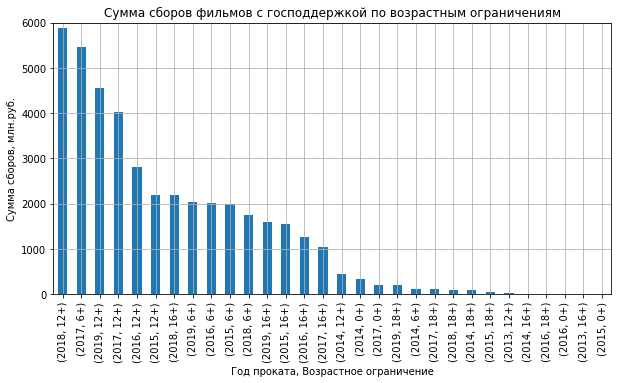

In [108]:
# строим столбчатую диаграмму суммы сборов по возрастным ограничениям и годам проката
data_mkrf_supp_good.pivot_table(
    index=[
        'show_start_year',
           'age_restriction'
    ],
    values='box_office',
    aggfunc='sum'
).sort_values(
    by='box_office',
    ascending=False
).plot(
    kind='bar',
    y='box_office', 
    style='o-',
    figsize=(10,5),
    ylim=(0,6000),
    grid=True,
    legend=False 
);

plt.xlabel('Год проката, Возрастное ограничение')
plt.ylabel('Сумма сборов, млн.руб.')
plt.title('Сумма сборов фильмов с господдержкой по возрастным ограничениям')
plt.show()

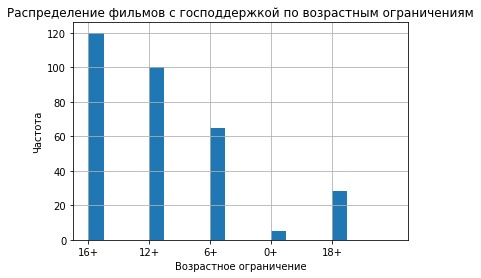

In [109]:
# смотрим распределение фильмов по возрастным ограничениям на гистограмме
data_mkrf_supp_good[
    'age_restriction'
].hist(
    bins=20,
    range=(0,5)
); 

plt.xlabel('Возрастное ограничение')
plt.ylabel('Частота')
plt.title('Распределение фильмов с господдержкой по возрастным ограничениям')
plt.show()

In [110]:
# смотрим суммарные сборы фильмов с господдержкой по возрастным ограничениям, млн.руб.
data_mkrf_supp_good.groupby('age_restriction')['box_office'].sum().sort_values(ascending=False)

age_restriction
12+    19957.963849
6+     13383.991633
16+     7658.462707
18+      560.158732
0+       552.932768
Name: box_office, dtype: float64

In [111]:
# смотрим суммарные бюджеты фильмов с господдержкой по возрастным ограничениям, млн.руб.
data_mkrf_supp_good.groupby('age_restriction')['budget'].sum().sort_values(ascending=False)

age_restriction
12+    14297.704336
6+     12989.875604
16+    11574.041852
18+     2309.837162
0+       806.678488
Name: budget, dtype: float64

In [112]:
# смотрим окупаемость фильмов с господдержкой по возрастным ограничениям, %.
data_mkrf_supp_good.groupby('age_restriction')['budget_payback'].sum().sort_values(ascending=False)

age_restriction
12+    107.268656
16+     87.621463
6+      58.742152
18+      6.770928
0+       2.208712
Name: budget_payback, dtype: float64

#### Вывод. Возрастные ограничения


   - Вывели **сборы фильмов с господдержкой в прокате по возрастным ограничениям и по годам**, млн.руб.:
   
                    count	        sum		
         year	age  		
         2019	12+	 15	 4559.753990
         2018	12+	 18	 5883.937270
         2017	 6+	  9	 5464.848709
         2016	12+	 24	 2817.273262
         2015	12+	 23	 2201.135939
         2014	12+	  5	  447.916664
         2013	12+	  1	  19.957032

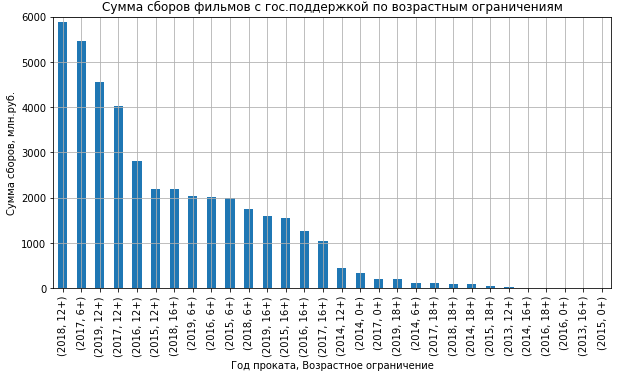  


   - **Максимальные сборы** за весь период наблюдались **в 2018 году** у фильмов с господдержкой **с** возрастным **ограничением '12'+**;
   
   - **Максимальную кассу** за весь период **собрали фильмы** с господдержкой возрастной категории **'12+'**. Они же - безусловные фавориты за все годы, кроме 2017 года.  
   
   
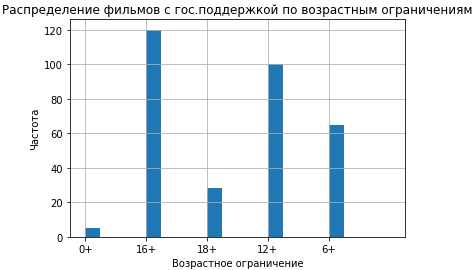   


   - **Чаще всего** из фильмов с господдержкой в прокат **выходили фильмы** категории **'16+'** 
   


   - Суммарные **сборы** фильмов с господдержкой по возрастным ограничениям, млн.руб.:
   
         age             sum
         12+    19957.963849
         6+     13383.991633
         16+     7658.462707
         18+      560.158732
         0+       552.932768



   - Суммарные **бюджеты** фильмов с господдержкой по возрастным ограничениям, млн.руб.:

         age             sum
         12+    14297.704336
         6+     12989.875604
         16+    11574.041852
         18+     2309.837162
         0+       806.678488

   - **Окупаемость** фильмов с господдержкой по возрастным ограничениям, %.:
 
         age              %
         12+     107.268656
         16+      87.621463
          6+      58.742152
         18+       6.770928
          0+       2.208712
  
  
   - **Большинство** фильмов с господдержкой **не окупились** в прокате. **Исключение**  - фильмы категории **'12+'**.         

In [113]:
# смотрим общие сборы фильмов с господдержкой по жанрам, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='genre',
    values='box_office',
    aggfunc='sum'
).sort_values(by='box_office', ascending=False)

,box_office
genre,
комедия,12479.977571
драма,9490.844093
мультфильм,5622.014109
спорт,2967.768392
фантастика,1718.204266
другой,1481.748766
история,1455.468212
приключения,1205.596996
военный,1017.670486


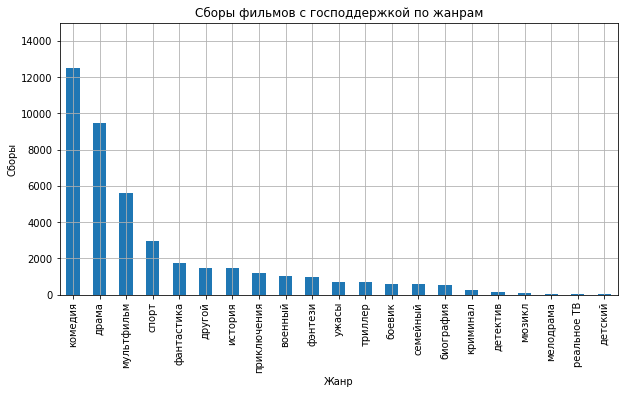

In [114]:
# строим диаграмму распределения сборов фильмов с господдержкой по жанрам, млн.руб.
(data_mkrf_supp_good.pivot_table(
    index='genre',
    values='box_office',
    aggfunc='sum'
).sort_values(
    by='box_office', ascending=False
)
     
.plot(
    kind='bar',
    y='box_office', 
    style='o-',
    figsize=(10,5),
    ylim=(0,15000),
    grid=True,
    legend=False 
));

plt.xlabel('Жанр')
plt.ylabel('Сборы')
plt.title('Сборы фильмов с господдержкой по жанрам')
plt.show()

In [115]:
# смотрим бюджет фильмов с господдержкой по жанрам, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='genre',
    values='budget',
    aggfunc='sum'
).sort_values(by='budget', ascending=False)

,budget
genre,
драма,10829.852472
комедия,6000.439352
мультфильм,5796.793404
приключения,3316.866064
фэнтези,2340.123796
история,2145.062208
фантастика,1499.100792
триллер,1350.960936
военный,1285.906832


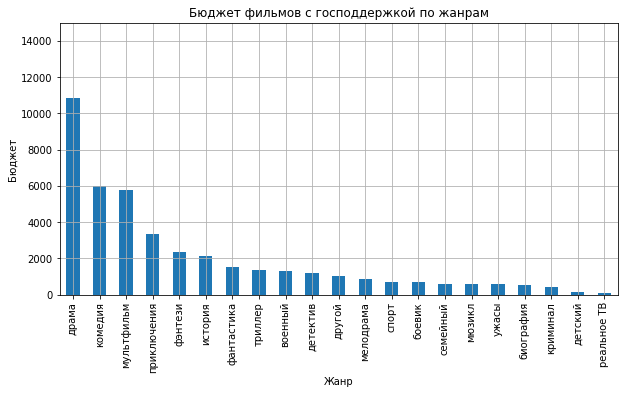

In [116]:
# строим диаграмму распределение бюджета фильмов с господдержкой по жанрам, млн.руб.
(data_mkrf_supp_good.pivot_table(
    index='genre',
    values='budget',
    aggfunc='sum'
).sort_values(
    by='budget', ascending=False
)
     
.plot(
    kind='bar',
    y='budget', 
    style='o-',
    figsize=(10,5),
    ylim=(0,15000),
    grid=True,
    legend=False 
));

plt.xlabel('Жанр')
plt.ylabel('Бюджет')
plt.title('Бюджет фильмов с господдержкой по жанрам')
plt.show()

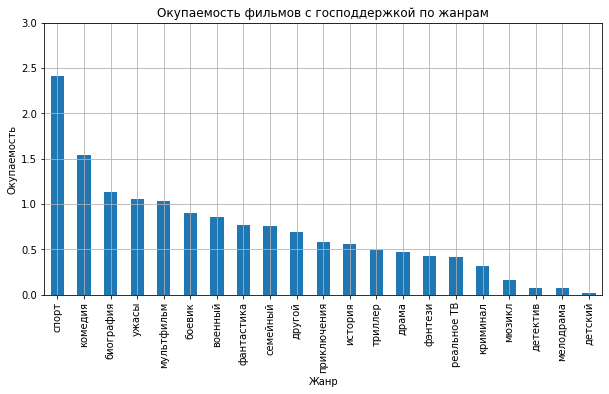

In [117]:
# строим диаграмму окупаемости фильмов с господдержкой по жанрам, млн.руб.
(data_mkrf_supp_good.pivot_table(
    index='genre',
    values='budget_payback',
    aggfunc='mean'
).sort_values(
    by='budget_payback', ascending=False
)
     
.plot(
    kind='bar',
    y='budget_payback', 
    style='o-',
    figsize=(10,5),
    ylim=(0,3),
    grid=True,
    legend=False 
));

plt.xlabel('Жанр')
plt.ylabel('Окупаемость')
plt.title('Окупаемость фильмов с господдержкой по жанрам')
plt.show()

  #### Вывод. Жанры


   - Вывели **общие сборы** фильмов с господдержкой в прокате **по жанрам**, млн.руб.:
   
       
                         box_office
               genre	
             комедия	12479.977571
               драма	 9490.844093
          мультфильм	 5622.014109 
               спорт	 2967.768392
          фантастика	 1718.204266
              другой	 1481.748766
             история	 1455.468212
         приключения	 1205.596996
             военный	 1017.670485
             фэнтези	  995.836611
               ужасы	  710.123195
             триллер	  700.450188
              боевик	  595.928940
            семейный	  584.424739
           биография	  516.883021
            криминал	  239.793867
            детектив	  138.547515
              мюзикл	  101.705002
           мелодрама	   54.788965
         реальное ТВ	   32.721104
             детский	    3.013652
             
             
   -  **Лидеры** проката - **'комедия'** (с большим отрывом),  **'драма' и 'мультфильмы'**:   
   
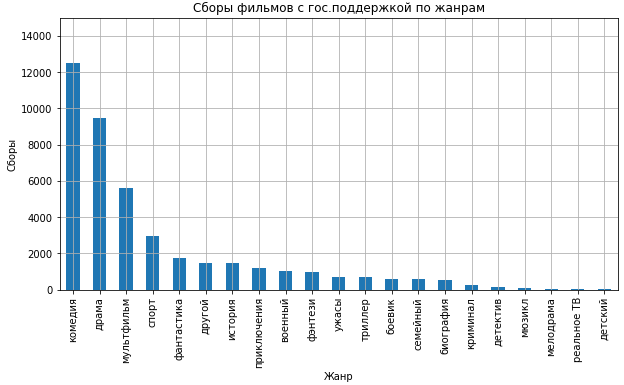  
  
  
   - Но **по бюджетам**,  далеко впереди - **'драма'** :
 
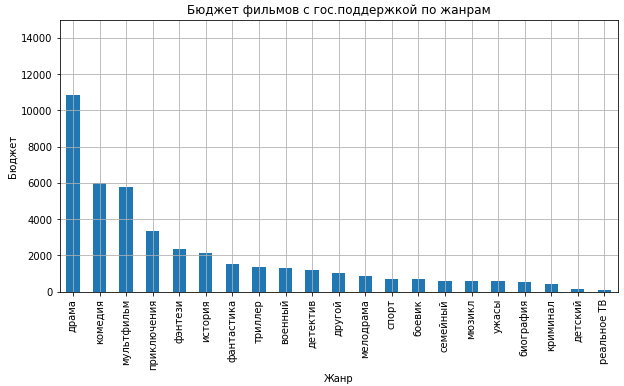

   - **По окупаемости** картина другая: со значительным отрывом **лидирует 'спорт'**. На **втором месте -'комедия'**.      
   - Только **пять категорий** фильмов по жанрам **окупаются** в прокате: **'спорт', 'комедия', 'биография', 'ужасы', 'мультфильмы'.** 
    
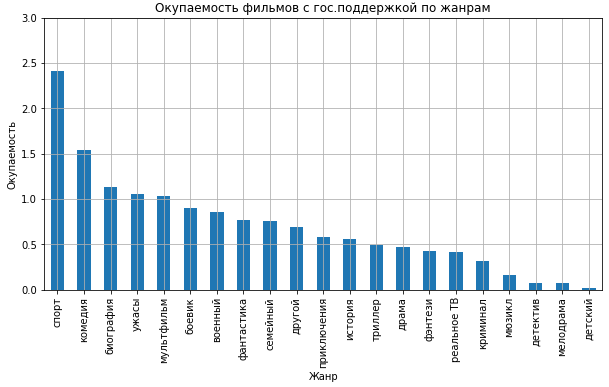    

In [118]:
# смотрим топ-5 режиссеров по сумме полученной господдержки, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='director_name',
    values='support_total',
    aggfunc='sum'
).sort_values(
    by='support_total', ascending=False
).head(5)

,support_total
director_name,
Н.Хомерики,660.000000
А.Кравчук,500.000000
Р.Давлетьяров,459.847944
А.Мизгирев,450.000000
Н.Лебедев,442.104480


In [119]:
# смотрим топ-5 режиссеров по окупаемости фильмов с господдержкой 
data_mkrf_supp_good.pivot_table(
    index='director_name',
    values='budget_payback'
    
).sort_values(
    by='budget_payback', ascending=False
).head(5)

,budget_payback
director_name,
О.Трофим,9.729984
А.Черномазов (псевдоним Алексей Нужный),7.227251
К.Шипенко,6.921344
А.Першин (псевдоним Ж.Крыжовников),5.229157
М.Бальчюнас,5.081857


In [120]:
# смотрим топ-5 студий по сумме полученной господдержки, млн.руб. 
data_mkrf_supp_good.pivot_table(
    index='film_studio',
    values='support_total',
    aggfunc='sum'
).sort_values(
    by='support_total', ascending=False
).head(5)

,support_total
film_studio,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",842.10448
"ООО ""Нон-Стоп Продакшн""",840.00000
"ООО ""ТаББаК""",688.00000
"ООО ""Студия анимационного кино ""Мельница""",630.00000
"ЗАО ""Дирекция кино""",500.00000


In [121]:
# смотрим топ-5 студий по окупаемости фильмов с господдержкой
data_mkrf_supp_good.pivot_table(
    index='film_studio',
    values='budget_payback'

).sort_values(
    by='budget_payback', ascending=False
).head(5)

,budget_payback
film_studio,
"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",19.209805
"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", Государственная телевизионная компания ""Телеканал ""Россия"" - филиал федерального государственного унитарного предприятия ""Всероссийская государственная телевизионная и радиовещательная компания""",9.729984
"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",7.227251
"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",6.643566
"ООО ""Смарт ТВ Продакшн""",5.081857


In [122]:
# смотрим топ-5 фильмов по сумме полученной господдержки, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='title',
    values='support_total',
    aggfunc='sum'
).sort_values(
    by='support_total', ascending=False
).head(5)

,support_total
title,
Союз спасения,500.00000
Дуэлянт,450.00000
Экипаж .,442.10448
Движение вверх,400.00000
Легенда о Коловрате,350.00000


In [123]:
# смотрим топ-5 фильмов с господдержкой по сборам, млн.руб.
data_mkrf_supp_good.pivot_table(
    index='title',
    values='box_office',
    aggfunc='sum'
).sort_values(
    by='box_office', ascending=False
).head(5)

,box_office
title,
Холоп,3073.568768
Движение вверх,2779.686144
Т-34,2271.753984
Последний богатырь,1655.037696
Лёд,1445.731840


In [124]:
# смотрим топ-5 фильмов с господдержкой по окупаемости
data_mkrf_supp_good.pivot_table(
    index='title',
    values='budget_payback'

).sort_values(
    by='budget_payback', ascending=False
).head(5)

,budget_payback
title,
Холоп,19.209805
Лёд,9.729984
Я худею,7.227251
"Гуляй, Вася !",6.643566
Дуxless 2,5.948847


In [125]:
# смотрим топ-5 фильмов с господдержкой по рейтингу
data_mkrf_supp_good.pivot_table(
    index='title',
    values='ratings'

).sort_values(
    by='ratings', ascending=False
).head(5)

,ratings
title,
Главный,9.4
Я умею вязать,9.0
А зори здесь тихие..._,8.5
БОЛЬШОЙ,8.5
Миллиард,8.2


In [126]:
# выведем информацию о топ-5 фильмах с господдержкой, окупившихся в прокате 
data_mkrf_supp_good.loc[data_mkrf_supp_good[
    'budget_payback'
]>5.948846
                       ].sort_values(
    by='budget_payback',
    ascending=False
)

,pu_number,box_office,title,type,film_studio,production_country,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,show_start_year,genre,director_name,support_share,support_total,budget_payback,support_payback
7455,111021719,3073.568768,Холоп,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25.0,35.000,160.000000,Фонд кино,6.8,2019,комедия,К.Шипенко,0.375000,60.000,19.209805,51.226146
5707,111000518,1445.731840,Лёд,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",12+,25.0,60.000,148.585216,Фонд кино,NaN,2018,другой,О.Трофим,0.572062,85.000,9.729984,17.008610
5748,111001618,633.462272,Я худею,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",16+,0.0,30.000,87.649128,Министерство культуры,6.9,2018,комедия,А.Черномазов (псевдоним Алексей Нужный),0.342274,30.000,7.227251,21.115409
3228,111018216,259.099072,"Гуляй, Вася !",Художественный,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Россия,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский...",16+,0.0,25.345,39.000000,Министерство культуры,6.5,2016,комедия,Р.Каримов,0.649872,25.345,6.643566,10.222887
2057,111000415,446.163520,Дуxless 2,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75.000,75.000000,Фонд кино,6.6,2015,драма,Р.Прыгунов,1.000000,75.000,5.948847,5.948847


#### Вывод. Топ-5


   - **топ-5 режиссеров по сумме** полученной **господдержки**, млн.руб.:
   
                                              support_total
                                director_name	
                                    Н.Хомерики	660.000000
                                     А.Кравчук	500.000000
                                 Р.Давлетьяров	459.847944
                                    А.Мизгирев	450.000000
                                     Н.Лебедев	442.104480
  
   
   - **топ-5 режиссеров по окупаемости** фильмов с господдержкой: 
   
                                              budget_payback
                                  director_name	
                                        О.Трофим	9.729984
         А.Черномазов (псевдоним Алексей Нужный)	7.227251
                                       К.Шипенко	6.921344
              А.Першин (псевдоним Ж.Крыжовников)	5.229157
                                     М.Бальчюнас	5.081857
                                     
   
   - **топ-5 студий по сумме** полученной **господдержки**, млн.руб.: 
   
                                                  support_total
                                       film_studio	
             ООО "Студия "ТРИТЭ" Никиты Михалкова"	842.10448
                           ООО "Нон-Стоп Продакшн"	840.00000
                                      ООО "ТаББаК"	688.00000
         ООО "Студия анимационного кино "Мельница"	630.00000
                               ЗАО "Дирекция кино"	500.00000
    
   
   - **топ-5 студий по окупаемости** фильмов с господдержкой:
   
                                                           budget_payback
                                        film_studio	
            ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"	         19.209805
            
            ООО "Водород 2011", ООО "Арт Пикчерс Студия", 
            Государственная телевизионная компания "Телеканал "Россия" 
            - филиал федерального государственного унитарного предприятия 
            "Всероссийская государственная телевизионная и радиовещательная 
            компания"                                            9.729984
            ООО "Друг Друга", ООО "Ди Пи Джи"	                7.227251
            ООО Кинокомпания "Инвада Фильм", АО "ВБД Груп"	   6.643566
            ООО "Смарт ТВ Продакшн"	                          5.081857
          
          
   
   - **топ-5 фильмов по сумме** полученной **господдержки**, млн.руб.:
   
                            support_total
                       title	
               Союз спасения	500.00000
                     Дуэлянт	450.00000
                    Экипаж .	442.10448
              Движение вверх	400.00000
         Легенда о Коловрате	350.00000
   
   
   
   
   - **топ-5 фильмов** с господдержкой **по сборам**, млн.руб.:
         
                                 box_office
                     title	
                      Холоп	 3073.568768
             Движение вверх	 2779.686144
                       Т-34	 2271.753984
         Последний богатырь	 1655.037696
                        Лёд	 1445.731840

   
   - **топ-5 фильмов** с господдержкой **по окупаемости:**
    
                         budget_payback
                     title	
                     Холоп	19.209805
                       Лёд	 9.729984
                   Я худею	 7.227251
             Гуляй, Вася !	 6.643566
                 Дуxless 2	 5.948847
      
   
   
   - **топ-5 фильмов** с господдержкой **по рейтингу:**
       
       	                     ratings
                          title	
                        Главный	 9.4
                  Я умею вязать	 9.0
         А зори здесь тихие..._	 8.5
                        БОЛЬШОЙ	 8.5
                       Миллиард	 8.2

   
   - **5 режиссеров и студий**, получивших **наибольшие суммы  господдержки,** **не** вошли **в топ-5** по **окупаемости** фильмов.
   
   
   - **5 первых фильмов**, получивших наибольшие суммы господдержки,  не вошли в топы по окупаемости, сборам и рейтингу. 
   
   
   - **Лидер по сборам** и **окупаемости**  - картина **'Холоп'**, **комедия 2019** года, режиссера **К.Шипенко**, производства **студии ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"**, с возрастным рейтингом  **12+**, с общим **бюджетом 160 млн.руб.**, получившая **60 млн.руб.** господдержки из **'Фонда кино'**, ** **с рейтингом** на Кинопоиске:  **6.8**, **собравшая** в прокате рекордные  **3.073568768 млрд. рублей**. 
   

## Общий вывод

### Знакомство с данными и предобработка 
   

- Изучили и объединили данные из двух источников, провели предобработку: обработали пропуски, аномалии, дубликаты, количественные и категориальные значения, оптимизировали  типы данных, добавили новые столбцы. 
     
     
### Исследовательский анализ  данных. 

- Провели исследовательский анализ общей базы кинопроката и отдельно фильмов, получивших господдержку. 


#### Общая база

#####  Информация о прокате

   - Определили, сколько фильмов выходило в прокат каждый год:
     
       	              year  film
                       2010     983
                       2011	 622
                       2012	 593
                       2013	 630
                       2014     806
                       2015	 705
                       2016	 818
                       2017	 505
                       2018	 891
                       2019	 930
  
  - Посмотрели динамику выхода фильмов в прокат по годам:
   
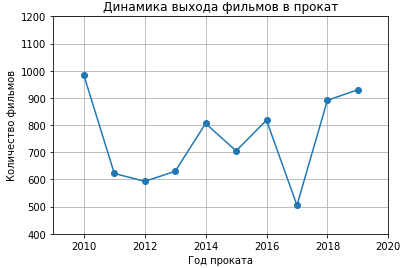
 
 
   - Посмотрели, как меняется доля фильмов с информацией о прокате год от года;
 

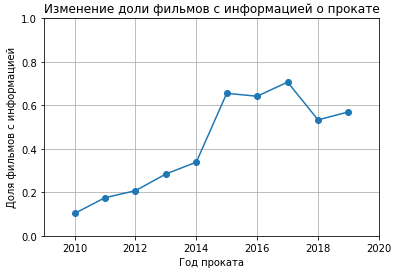

   - Посчитали **долю** фильмов **с** указанной **информацией о прокате** в кинотеатрах: 
            
      - **41.88%**'.       


##### Информация о сборах

   - Посмотрели динамику сборов в прокате по годам:
   
   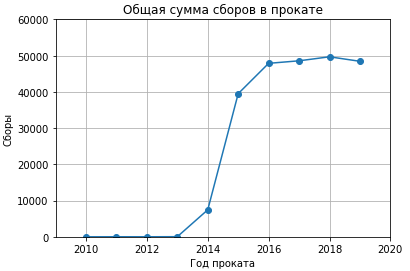
   
      
   - Посмотрели суммы сборов фильмов в прокате по годам, млн.руб. 

     - **Максимальная** сумма сборов была в **2018** году: **49668.403121 млн.руб.**

     - **Минимальная** сумма сборов была в **2010** году: **2.428654 млн.руб.**


   - Посчитали и посмотрели на графиках медианную и среднюю сумму сборов по годам: 
   
    
    year		mean	median
     2010	  0.024046	0.001710
     2011	  0.129383	0.003000
     2012	  0.056548	0.006220
     2013	  0.166479	0.003580
     2014	 27.270886	0.020400
     2015	 85.492133	5.003450
     2016	 91.173904	3.915041 
     2017	136.032793	9.968340
     2018	104.565059	8.891102
     2019	 91.369262	4.627798

   - Большая часть фильмов (больше 80%) имеет скромные сборы (на уровне 5 млн.), а оставшиеся 20% собирают в среднем больше 300 млн. А еще есть хиты со сборами от 500 млн.. Это сильно смещает среднее значение. 
   
   
##### Влияние возрастных ограничений на прокат 2015-2019гг 

   - **Оценили влияние** возрастных **ограничений** аудитории **на сборы** в прокате в период **2015-2019 гг:**


    age_restriction    box_office
               16+    76034.733946
               12+    60619.446875
                6+    55798.610450
               18+    40759.615671
                0+      809.077428
 
   - Рассчитали **количество фильмов** по возрастным ограничениям за период **2015-2019 гг.:**
   
          age_restriction   count
                      16+    1172
                      18+    1086
                      12+     789
                       6+     485
                       0+     317
               
   - Посчитали влияние возрастных ограничений по среднему и медианному значению:
       
                    	                 box_office_mean
                     year  age	count	
                     2019	6+	  133	   96.635704
                     2018	6+	  114	   88.640127
                     2017	6+	   66	  183.123366
                     2016	6+	   95	  126.875220
                     2015	6+	   77	  113.010380

                                         box_office_median
                     year   age	  count
                     2019	18+	   255	    2.497044
                     2018	18+	   222	    4.708034
                     2017	 6+	    66    	5.768688
                     2016	16+	   269	    0.763958
                     2015	 0+	    50	    1.587567
 
 
   - Если считать  **по среднему** - каждый год по сборам **лидируют** фильмы категории **'6+'**. Значит каждый фильм этой категории в среднем собрал большую кассу, чем фильмы из других возрастных категорий. 

   - Если оценивать **по медианному** значению, картина иная: в **разные годы** лидерами наибольшую кассу собирали фильмы **разной возрастной категории**. Видимо, сказывается влияние выходивших в эти годы топов.               
   - **Лидеры по сборам** - это фильмы **'16+'**(старшие подростки), на **втором** месте - **'12+**(подростки), **замыкает** пятерку детская аудитория - **'0+'**               


   - **Каждый год** ситуация разная: **самую большую кассу** в **2019, 2015 и период 2016-2018** **собрали фильмы с разным возрастным ограничением**:   
   
            year   age_restriction  box_office_max
            2019	 6+	            12852.548694
            2018	16+	            16503.602465
            2017	16+	            18745.042872
            2016	16+	            16664.548577
            2015	12+	            13616.082102
 
 
   - На графиках видно, что за весь период **в тройке лидеров** по сборам находятся фильмы **'16+' 2017-2016-2018 гг.**

   - По **списку топ-10** фильмов по сборам в **прокате** видно (особенно по 2019 и 2015 году), что **самыми кассовыми** в разные годы **становились фильмы с разным возрастным ограничением**;
 
 
   - **Сборы** напрямую **зависят** от **популярности фильмов** среди зрителей, а год от года **популярными** **становятся фильмы** для **разной возрастной категории**. В этом **причина** того, что **суммарные сборы** в прокате каждый год имеют фильмы с **разным возрастным цензом**; 
     
     
   - При этом, количество фильмов определенной возрастной категории не имеет такого влияния на общие сборы категории, как сборы конкретных фильмов, особенно хитов. Другими словами, объем той или иной аудитории и количество фильмов предлагаемых за год этой аудитории - не важны. Важно - нравится ли аудитории тот или иной фильм. Если нравится, заполняемость залов, а, следовательно, и касса категории, растут, если не нравится - ситуация обратная. 


#### Фильмы с государственной поддержкой

   - **Отфильтровали** данные (оставили **только ненулевые значения** в поле **господдержки** и **фильмы**, с известной **суммой сборов**); 
   
   - Рассчитали и **добавили столбцы**: **'support_total'** - с **суммой господдержки**; **'budget_payback'** - с окупаемостью (**выручка/бюджет**); **'support_payback'** - с окупаемостью  по выделенным средствам господдержки (**выручка/господдержка**); оставили в датафрейме только нужные столбцы;
   
   - Посчитали основные параметры общей господдержки:
   
          count      332.000000
           mean       60.845447
            std       72.755459
            min        3.000000
            25%       25.333750
            50%       35.000000 
            75%       60.000000
            max      500.000000
   
   - Сделали первые выводы:
               
     - Общая **сумма выделенных средств** за 10 лет: **20200.688316 млн.руб**.
            
     - Общая **доля господдержки в бюджете** фильмов с господдержкой за 10 лет: **46.3 %.**
   
   
   - Построили графики числовых колонок и изучили данные:
      
      - Интересные особенности: 

        - **Основная масса** фильмов собирает в прокате (**'box_office'**) - **до 500 млн.руб.** Медиана - 15,7 млн.руб. **Среднее - 132.42 млн.руб.**

        - Это почти совпадает со **средним** бюджетом фильмов (**'budget'**)  - **132.00 млн.руб.**, и **бюджет** большинства фильмов также лежит в пределах **до 500 млн.руб.**, из чего можно заключить, что **большинство фильмов не окупается в прокате**.

        - Обращает на себя внимание, что **суммы** выделяемых студиям **возвратных средств** (**'refundable_support'**) гораздо **ниже**, чем **невозвратные** **'nonrefundable_support'** суммы. Возможно, это связано с условиями договора, в котором прописывается участие инвестора в будущей прибыли. Но **выглядит странно**, учитывая то, что **фильмы** в среднем **собирают** в прокате **больше**, чем выделяемая **сумма господдержки**. **Средняя сумма** господдержки - **48 млн.руб**. 

        - Самый **частый рейтинг** на Кинопоиске (**'ratings'**) - **6**, что говорит о **невысокой популярности** фильмов с господдержкой в основной своей массе.  

        - **Больше всего** фильмов поддерживалось **в 2015 году** (**'show_start_year'**), потом - спад, странная **яма в 2017г.** и снова - подъем.

        - **Большинство** фильмов **получали** господдержку в районе **60-70%%** **от** суммы **бюджета**. Но **есть** внушительный **пик** в районе **100%**.  

        - Картина **общей суммы господдержки** (**'support_total'**) **похожа** на ситуацию с **невозвратными средствами**. Неудивительно, учитывая, что **общий объем невозвратных средств** господдержки значительно **выше**, чем **объем возвратных**. 
        
        - **Средняя окупаемость по бюджету** фильмов (**'budget_payback'**) - **83%**, при **медиане 18%**. Что подтверждает тезис о том, что **большинство фильмов не окупились в прокате**. 

        - С **окупаемостью по господдержке** (**'support_payback**) **картина**, ожидаемо, **другая** - **окупаемость** значительно **выше** (в 2 раза), чем по бюджету, **хотя** в большинстве случаев и **не дотягивает до 100%**.  
        
     - **Общая доля господдержки в сборах** фильмов с господдержкой за 10 лет: **45.86 %**.

     - **Общая окупаемость** (**сборы/бюджет**) фильмов с господдержкой за 10 лет: **100.32 %**.

     - **Средняя окупаемость** (**сборы/бюджет**) фильмов с господдержкой за 10 лет: **82.58 %**.

     - **Общая окупаемость** (**сборы/господдержка**) средств господдержки за 10 лет: **7053.28 %**.
 
 
##### Годовая динамика. Окупаемость

   - Вывели **распределение** и рассмотрели на графиках суммы выделяемых средств **господдержки по годам**:      
     
          
         year	sum support
         2013	 134.347944
         2014	 572.002300
         2015	3656.241459
         2016	4303.155480
         2017	3183.971661
         2018	3446.969472
         2019	4904.000000
          All  20200.688316
      
  
   - С 2013 по 2019 год **общая сумма господдержки** в целом **растет**, несмотря на небольшое падение 2017-2018 годах. То же с количествами фильмов, которым выделяется господдержка: **количество** в целом **растет** - **2 в 2013** году против **70 в 2019**. Пиковое значение наблюдается **в 2015 году - 86 фильмов**, тогда как сумма выделенных средств не самая большая. 
  
           
         year  count support	
         2013	           2
         2014	          16
         2015	          86
         2016	          61
         2017	          41
         2018              56
         2019	          70
          All	         332
   
 
   - **Доля** господдержки **в сборах**:
 
     - Общая доля господдержки в сборах фильмов с господдержкой за **2013 год: 661.08 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2014 год: 56.22 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2015 год: 62.77 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2016 год: 70.57 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2017 год: 28.98 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2018 год: 34.7 %.**
   
     - Общая доля господдержки в сборах фильмов с господдержкой за **2019 год: 48.59 %.**
   
   
   -  Разобрали **окупаемость** фильмов с господдержкой **по годам**:
 
 
                         
                   year	budget_payback
                   2013	      0.058989
                   2014	      0.614135
                   2015	      0.621609
                   2016	      0.697296
                   2017	      1.033974
                   2018	      1.161494
                   2019	      0.877077
                                      

   - **Доля окупаемости** фильмов **растет**, **но** показатель **100% и выше** наблюдается **только в 2017 и 2018 годах**. 
 
 
   - Это подтверждается и гистограммой: **большинство фильмов с господдержкой не окупается в прокате**. 


##### Динамика сборов. Рейтинг


   - Вывели **сборы фильмов с господдержкой в прокате  **по годам**, млн.руб.:
  
         	          box_office
              year	
              2013	    20.322386
              2014	  1017.422188
              2015	  5785.285394
              2016	  6081.707808
              2017	 10865.075371
              2018	  9934.068989
              2019      8409.627554
               All	 42113.509689

   


   - **Сборы** год от года **растут**. **Максимальная сумма** - 10865.075371 млн.руб., была собрана **в 2017 году**. В 2018 и 2019 году наблюдалось предсказуемое падение - в связи с пандемией. 
 
   
   - Посчитали **изменение среднего рейтинга** фильмов с господдержкой **по годам**:
           
                  ratings
         year	
         2013	6.700000
         2014	6.006667
         2015	6.137805
         2016	5.653572
         2017	5.989189 
         2018	6.001887
         2019	6.225862
 
 


   - **Максимальные значения** рейтинга фильмов с господдержкой наблюдались (у двух фильмов) **в 2013 году**. Затем **три года** подряд **рейтинги падали**. **С 2017** наметился **рост**. Тем не менее, уровня **2013 года** они **не достигли**.


   - Сравнили с рейтингами фильмов без господдержки:
 
                 ratings
          year	
          2010	6.726483
          2011	6.530729
          2012	6.545156
          2013	6.513081
          2014	6.531586
          2015	6.357778
          2016	6.424128
          2017	6.344836
          2018	6.429043
          2019	6.538333



   - **В 2013** **рейтинги** фильмов **с господдержкой** были **выше**. В **остальные годы** фильмы **без господдержки** **пользовались** большей **зрительской симпатией**.


##### Возрастные ограничения


   - Вывели **сборы фильмов с господдержкой в прокате по возрастным ограничениям и **по годам**, млн.руб.:
   
                      count	        sum		
         year	age  		
         2019	12+	 15	 4559.753990
         2018	12+	 18	 5883.937270
         2017	 6+	  9	 5464.848709
         2016	12+	 24	 2817.273262
         2015	12+	 23	 2201.135939
         2014	12+	  5	  447.916664
         2013	12+	  1	  19.957032



   - **Максимальные сборы** за весь период наблюдались **в 2018 году** у фильмов с господдержкой **с** возрастным **ограничением '12'+**;
   
   - **Максимальную кассу** за весь период **собрали фильмы** с господдержкой возрастной категории **'12+'**. Они же - безусловные фавориты за все годы, кроме 2017 года.  
      


   - **Чаще всего** из фильмов с господдержкой в прокат **выходили фильмы** категории **'16+'** 
   


   - Суммарные **сборы** фильмов с господдержкой по возрастным ограничениям, млн.руб.:
   
         age             sum
         12+    19957.963849
         6+     13383.991633
         16+     7658.462707
         18+      560.158732
         0+       552.932768



   - Суммарные **бюджеты** фильмов с господдержкой по возрастным ограничениям, млн.руб.:

         age             sum
         12+    14297.704336
         6+     12989.875604
         16+    11574.041852
         18+     2309.837162
         0+       806.678488

   - **Окупаемость** фильмов с господдержкой по возрастным ограничениям, %.:
 
         age              %
         12+     107.268656
         16+      87.621463
          6+      58.742152
         18+       6.770928
          0+       2.208712
  
  
   - **Большинство** фильмов с господдержкой **не окупились** в прокате. **Исключение**  - фильмы категории **'12+'**.  


##### Жанр


   - Вывели **общие сборы** фильмов с господдержкой в прокате **по жанрам**, млн.руб.:
   
       
                         box_office
               genre	
             комедия	12479.977571
               драма	 9490.844093
          мультфильм	 5622.014109 
               спорт	 2967.768392
          фантастика	 1718.204266
              другой	 1481.748766
             история	 1455.468212
         приключения	 1205.596996
             военный	 1017.670485
             фэнтези	  995.836611
               ужасы	  710.123195
             триллер	  700.450188
              боевик	  595.928940
            семейный	  584.424739
           биография	  516.883021
            криминал	  239.793867
            детектив	  138.547515
              мюзикл	  101.705002
           мелодрама	   54.788965
         реальное ТВ	   32.721104
             детский	    3.013652
             
             
   -  **Лидеры** проката - **'комедия'** (с большим отрывом),  **'драма' и 'мультфильмы'**:   
    
  
   - Но **по бюджетам**,  далеко впереди - **'драма'** :


   - **По окупаемости** картина другая: со значительным отрывом **лидирует 'спорт'**. На **втором месте -'комедия'**.      
   - Только **пять категорий** фильмов по жанрам **окупаются** в прокате: **'спорт', 'комедия', 'биография', 'ужасы', 'мультфильмы'.** 
    


##### Топ-5


   - **топ-5 режиссеров по сумме** полученной **господдержки**, млн.руб.:
   
                                              support_total
                                director_name	
                                    Н.Хомерики	660.000000
                                     А.Кравчук	500.000000
                                 Р.Давлетьяров	459.847944
                                    А.Мизгирев	450.000000
                                     Н.Лебедев	442.104480
  
   
   - **топ-5 режиссеров по окупаемости** фильмов с господдержкой: 
   
                                              budget_payback
                                  director_name	
                                        О.Трофим	9.729984
         А.Черномазов (псевдоним Алексей Нужный)	7.227251
                                       К.Шипенко	6.921344
              А.Першин (псевдоним Ж.Крыжовников)	5.229157
                                     М.Бальчюнас	5.081857
                                     
   
   - **топ-5 студий по сумме** полученной **господдержки**, млн.руб.: 
   
                                                  support_total
                                       film_studio	
             ООО "Студия "ТРИТЭ" Никиты Михалкова"	842.10448
                           ООО "Нон-Стоп Продакшн"	840.00000
                                      ООО "ТаББаК"	688.00000
         ООО "Студия анимационного кино "Мельница"	630.00000
                               ЗАО "Дирекция кино"	500.00000
    
   
   - **топ-5 студий по окупаемости** фильмов с господдержкой:
   
                                                           budget_payback
                                        film_studio	
            ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"	         19.209805
            
            ООО "Водород 2011", ООО "Арт Пикчерс Студия", 
            Государственная телевизионная компания "Телеканал "Россия" 
            - филиал федерального государственного унитарного предприятия 
            "Всероссийская государственная телевизионная и радиовещательная 
            компания"                                            9.729984
            ООО "Друг Друга", ООО "Ди Пи Джи"	                7.227251
            ООО Кинокомпания "Инвада Фильм", АО "ВБД Груп"	   6.643566
            ООО "Смарт ТВ Продакшн"	                          5.081857
          
          
   
   - **топ-5 фильмов по сумме** полученной **господдержки**, млн.руб.:
   
                            support_total
                       title	
               Союз спасения	500.00000
                     Дуэлянт	450.00000
                    Экипаж .	442.10448
              Движение вверх	400.00000
         Легенда о Коловрате	350.00000
   
   
   
   
   - **топ-5 фильмов** с господдержкой **по сборам**, млн.руб.:
         
                                 box_office
                     title	
                      Холоп	 3073.568768
             Движение вверх	 2779.686144
                       Т-34	 2271.753984
         Последний богатырь	 1655.037696
                        Лёд	 1445.731840

   
   - **топ-5 фильмов** с господдержкой **по окупаемости:**
    
                         budget_payback
                     title	
                     Холоп	19.209805
                       Лёд	 9.729984
                   Я худею	 7.227251
             Гуляй, Вася !	 6.643566
                 Дуxless 2	 5.948847
      
   
   
   - **топ-5 фильмов** с господдержкой **по рейтингу:**
       
       	                     ratings
                          title	
                        Главный	 9.4
                  Я умею вязать	 9.0
         А зори здесь тихие..._	 8.5
                        БОЛЬШОЙ	 8.5
                       Миллиард	 8.2

   
   - **5 режиссеров и студий**, получивших **наибольшие суммы  господдержки,** **не** вошли **в топ-5** по **окупаемости** фильмов.
   
   
   - **5 первых фильмов**, получивших наибольшие суммы господдержки,  не вошли в топы по окупаемости, сборам и рейтингу. 
   
   
   - **Лидер по сборам** и **окупаемости**  - картина **'Холоп'**, **комедия 2019** года, режиссера **К.Шипенко**, производства **студии ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"**, с возрастным рейтингом  **12+**, с общим **бюджетом 160 млн.руб.**, получившая **60 млн.руб.** господдержки из **'Фонда кино'**, ** **с рейтингом** на Кинопоиске:  **6.8**, **собравшая** в прокате рекордные  **3.073568768 млрд. рублей**. 


### Резюме
  
   - **Большинство** фильмов, получивших государственную поддержку, **не окупились** в прокате и **не получили высокий рейтинг**. Однако, **сборы**, полученные такими фильмами, многократно **превышают выделенные из госбюджета средства**. **Самые востребованные** среди них - это **комедии '12+'**.    